In [1]:
import numpy as np

In [2]:
load("https://raw.githubusercontent.com/jephianlin/minrank_aux/master/load_all.py")

xrange test passed


In [3]:
load_all()

Loading Zq_c.pyx...


Compiling /home/sage/.sage/temp/Coleman/929/tmp_P0lNhc.pyx...


Loading Zq.py...
Loading zero_forcing_64.pyx...


Compiling /home/sage/.sage/temp/Coleman/929/tmp_DjXQKM.pyx...
Compiling /home/sage/.sage/temp/Coleman/929/tmp_KQMIyB.pyx...


Loading zero_forcing_wavefront.pyx...
Loading minrank.py...
Loading inertia.py...
Loading general_Lib.sage...
---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.
Loading oc_diag_analysis.sage...
---gZ_leq, find_gZ, find_EZ, diagonal_analysis, etc.
Loading xi_dict.py...
---SAPreduced_matrix, has_SAP, find_ZFloor, Zsap, etc.
Loading mu_dict.py...
---get_mu_from_dict, find_mu, etc.
Loading SXP.sage...
This code contains extra copy of Z_game, Zell_game, Zplus_game, for the completeness of Zsap_game program.
Loading matrix_forcing.py...


In [4]:
def generateSparseMatrix(G,x):
#input graph G, and any vector x with the given support
    S=np.where(x== 0)[0];
    A=G.adjacency_matrix()/1;
    for i in S:
        B=G.neighbors(i)
        B=[b for b in B if b not in S]
        for j in B:
            A[i,j]=1/x[j]
            A[j,i]=1/x[j]
            if j==B[len(B)-1]:
                A[i,j]=(1-len(B))/x[j]
                A[j,i]=(1-len(B))/x[j]
    supportX=np.where(x!= 0)[0];
    for i in supportX:
        A[i,i]=-(np.dot(A,x)[i])/x[i]
    return A

In [5]:
def sparsestNullVector(G):
# input the connected graph G
# ouput the sparsest null vector number and print the set
    newlow = find_Z(G);
    newhigh = G.order()-1;
    sparselist=np.array([find_Z(G)-1]);
    while newlow<=newhigh:
        mid = (newhigh + newlow) // 2;
        comb=list(combinations(range(G.order()), mid));
        sparselistnum=0;
        for s in comb:
            if len(zerosgame(G, s))!=G.order():
                sparselistnum=sparselistnum+1
                sparselist=np.append(sparselist,[mid])
        if sparselistnum==0:
            newhigh=newhigh-1
        if sparselistnum>0:
            newlow=newlow+1
    maxnum=np.max(sparselist);  
    comb=list(combinations(range(G.order()), maxnum));
    for s in comb:
        if len(zerosgame(G, s))!=G.order():
            print'sparse', list(s), ', fort',  list(set(G.vertices()).difference(set(s)))
            G.graphplot(vertex_colors={'#FFD966': s, '#A3BCD2': list(set(G.vertices()).difference(set(s)))}).show()
    return maxnum;

In [6]:
def kForts(G,k):
# input the connected graph G
# ouput the set of forts of size k
    V = G.vertices()
    S = Subsets(V,k)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
    print k,'   ',len(Forts)          
        
    return list(Forts);
                    

In [7]:
def kFortsGraphs(G,k):
# input the connected graph G
# ouput the set of forts of size k
    V = G.vertices()
    S = Subsets(V,k)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
    for f in Forts:
        G.graphplot(vertex_colors={'#FFD966': f, '#A3BCD2': list(set(G.vertices()).difference(set(f)))}).show()         
        
    return list(Forts);

In [8]:
def All_Forts(G):
# input the connected graph G
# ouput the set of forts of g
    V = G.vertices()
    S = Subsets(V)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
        if len(list(s))==0:
            Forts.remove(s)
    return list(Forts);   

In [9]:
def Minimal_Forts(G):
# input the connected graph G
# ouput the set of minimal forts of g
    V = G.vertices()
    S = Subsets(V)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
        if len(list(s))==0:
            Forts.remove(s)
    #print 'Forts', Forts         

    NotMinimal=[]
    for t in Forts:
        for s in Forts:
            if len(list(t))>len(list(s)):
                if s.issubset(t)==True:
                    NotMinimal.append(t)
                    break
    #print 'Non-minimal forts', NotMinimal
    Minimal = Forts.difference(set(NotMinimal))
    return list(Minimal);

In [10]:
def flatten(l):
  out = []
  for item in l:
    if isinstance(item, (list, tuple)):
      out.extend(flatten(item))
    else:
      out.append(item)
  return out

In [11]:
def Col_Supp_Lifts(A):
    
    print 'rank = ', A.rank(), '\n'
    #print A, '\n'
    #n number of rows/columns in A
    n=len(list(A))
    
    #constructing the graph for A
    print 'G(A) = '
    G=Graph([])
    G.add_vertices(range(n))
    for i in range(0,n):
        for j in range(i+1,n):
            if A[i][j] != 0:
                G.add_edge((i,j))
    G.show()
    
    #print '===========================================================', '\n', 'Minimal support lifts for A ', '\n'

    #requires sage matroid package, sage.matroids.advanced import *
    kerA=Matrix(A.kernel().basis())

    #Computing matroid data for the null space of the null space

    M=Matroid(kerA)
    # The list of circuits for ker(A).  This should be the minimal supports of the column space.
    CM=sorted([sorted(C) for C in M.circuits()])
    #print CM

#     for i in range(len(CM)):
#         H=deepcopy(G)
#         H.add_vertex(n)
#         for j in range(len(CM[i])):
#             H.add_edges([(n,CM[i][j])])
        #H.show()
        #print H.graph6_string(), ' with neighbors of  ', n, CM[i]
        
    #Construct all unions of supports in CM
    N=[i for i in range(len(CM))]
    S=[list(s) for s in subsets(N)]
    print 'number of unions of column supports = ', len(S)

    # m=3500
    # print S[m], '\n'
    # U=[CM[k] for k in S[m]]
    # print list(set(flatten(U)))

    L=[]


    for j in range(len(S)):
         for k in range(len(S[j])):
            U=[CM[k] for k in S[j]]
            fU=list( set( flatten(U)))
            H=deepcopy(G)
            H.add_vertex(7)
            for i in range(len(fU)):
                H.add_edges([(7,fU[i])])
            #H.show()
            #print H.graph6_string()
            L.append(H.graph6_string())
    #Gets rid of duplicates in L
    L_new = list(set(L))

    m=len(L_new)
    L_new_remove=[]
    for i in range(m):
        for j in range(i+1,m):
            if Graph(L_new[i]).is_isomorphic(Graph(L_new[j])):
                L_new_remove.append(L_new[j])
    print 'number of unique unions = ', len(L_new)
    L_new_new = list( set(L_new).difference( set(L_new_remove)) )
    print 'number of non-isomorphic lifting graphs = ', len( L_new_new )
    #print list( L_new_new )
    
    return L_new_new;

In [12]:
def transversal_number(family):
    for i in range(n):
        Sub=Subsets(range(n),i)
        for s in Sub:
            if(not(any(s.intersection(G).is_empty() for G in family))):
                return(i)

def is_compatible(family):
    compatible=true
    for A in family:
        for G in family:
            if A !=G:
                for x in A.intersection(G):
                    if(not(any(H.issubset(A.union(G).difference({x})) for H in family))):
                        compatible=false
    return(compatible)

def is_precompatible(family,minfamily):
    compatible=true
    for A in family:
        for G in family:
            if A !=G:
                for x in A.intersection(G):
                    if(not(any(H.issubset(A.union(G).difference({x})) for H in minfamily))):
                         compatible=false
    return(compatible)

def is_precompatible_with(collection,newelement,family):
    compatible=true
    for G in collection:
        for x in newelement.intersection(G):
            if(not(any(H.issubset(A.union(G).difference({x})) for H in family))):
                compatible=false
    return(compatible)



In [13]:
#input: list of Sets, U
#output: list of Sets that are unions minus one element of pairs of Sets in U in the intersection per circuit exchange property
def ExchangeUnions(U):
    lenU=len(U)
    NewUnions=[]

    for j1 in range(lenU):
        for j2 in range(j1+1,lenU):
            union=U[j1].union(U[j2])
            inter=U[j1].intersection(U[j2])

            if len(inter)>0:
                for x in inter:
                    NewUnions.append(union.difference({x}))

    NewUnionsSet=list(set(NewUnions)) 
    
    return(NewUnionsSet)

#input: list of Sets, F
#output: list of pairs of indices of Sets in F for which the exchange property for circuits fundamentally fails on the input

def BadPairs(F):

    n=len(F)
    BadPairs=[]
    
    for i in range(n):
        for j in range(i+1,n):
            union=F[i].union(F[j])
            inter=F[i].intersection(F[j])

            #for i in range(m):
            if len(inter)>0:
                for x in inter:
                    N=union.difference({x})
            for f in F:
                if (not( any( f.issubset(N) for f in F) ) ):
                    BadPairs.append([i,j])
                    #print i,j, N, F[i],F[j]
                    break;


    return(BadPairs) 

#input: size of transversal 4, list of Sets F
#output:  list of indices for F with unique representatives of a minimum transversal of size 4 
def GoodIndices4(F):
    m=len(F)
    UniqFortRepIndex=Subsets(range(m),4)
    lenUFRI=len(UniqFortRepIndex)
    
    
    GoodIndices=[]
    

    for i in range(lenUFRI):
        U=[F[k] for k in UniqFortRepIndex[i]]
        #print U
        uniq=[]
        #if U[0] in U[1].union(U[2]).union(U[3])
        for x0 in U[0]:
            if not(x0 in U[1].union(U[2]).union(U[3])):
                uniq.append(x0)
                for x1 in U[1]:
                    if not(x1 in U[0].union(U[2]).union(U[3])):
                        uniq.append(x1)
                        for x2 in U[2]:
                            if not(x2 in U[0].union(U[1]).union(U[3])):
                                uniq.append(x2)
                                for x3 in U[3]:
                                    if not(x3 in U[0].union(U[1]).union(U[2])):
                                        uniq.append(x3)
                                        if len(list(set(uniq)))==4:
                                            GoodIndices.append(i)
      
    return(GoodIndices) 

def GoodIndices3(F):
    m=len(F)
    UniqFortRepIndex=Subsets(range(m),3)
    lenUFRI=len(UniqFortRepIndex)
    
    
    GoodIndices=[]
    

    for i in range(lenUFRI):
        U=[F[k] for k in UniqFortRepIndex[i]]
        #print U
        uniq=[]
        #if U[0] in U[1].union(U[2]).union(U[3])
        for x0 in U[0]:
            if not(x0 in U[1].union(U[2])):
                uniq.append(x0)
                for x1 in U[1]:
                    if not(x1 in U[0].union(U[2])):
                        uniq.append(x1)
                        for x2 in U[2]:
                            if not(x2 in U[0].union(U[1])):
                                uniq.append(x2)
                                if len(list(set(uniq)))==4:
                                    GoodIndices.append(i)
      
    return(GoodIndices) 






In [14]:
#input: list of sets F, all forts being considered, integer index, t size of transversal (n-rank)
def List_PC(index,F,t):
    m=len(F345)
    UFRI=Subsets(range(m),t)
    
    U=[F[k] for k in UFRI[index]]
    
    return(U)


#input: list of sets U, list of sets F that contains the list U
#output: a new list that contains U and any other sets from F guaranteed by exchange condition on circuits
def ReqForts(U,F):
    
    NUS=ExchangeUnions(U)
    m=len(NUS)
    NewU=copy(U)
    
    for j in range(m):
        if (not( any( u.issubset(NUS[j]) for u in U) ) ):
            #print j,NewUnionsSet[j],'\n','------------------'
            Y=NUS[j]
            if (not ( any(f.issubset(Y) for f in F) ) ):
                print Y,'incompatible'

            PossSubs=[]
            for f in F:
                if f.issubset(Y):
                    PossSubs.append(f)
                #print PossSubs
            if len(PossSubs)==1:
                NewU.append(PossSubs[0])

    return(NewU)


In [15]:
from sage.matroids.advanced import *
#from sage.matroids.advanced import setprint

In [16]:
from sage.graphs.connectivity import connected_components
from sage.graphs.connectivity import connected_components_sizes

In [17]:
from sage.graphs.graph_input import from_graph6
from sage.matrix.args import MatrixArgs

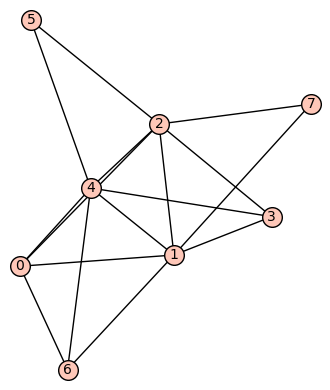

In [18]:
G1=G=Graph({1:[3],2:[4],3:[4,5,7],4:[6,7],5:[7],6:[7],7:[8]})
G2=Graph({0:[1,2,4,6],1:[3,6,7],2:[3,5,7],3:[4],4:[5,6]})
G3=Graph({0:[1,2,4,6],1:[2,3,6,7],2:[3,5,7],3:[4],4:[5,6]})
G4=Graph({0:[1,2,4,6],1:[4,3,6,7],2:[3,5,7],3:[4],4:[5,6]})
G5=Graph({0:[1,2,4,6],1:[2,3,6,7],2:[4,3,5,7],3:[4],4:[5,6]})
G6=Graph({0:[1,2,4,6],1:[2,4,3,6,7],2:[3,5,7],3:[4],4:[5,6]})
G7=Graph({0:[1,2,4,6],1:[2,4,3,6,7],2:[3,4,5,7],3:[4],4:[5,6]})
G7.show()

In [19]:
A1=All_Forts(G1)
A2=All_Forts(G2)
A3=All_Forts(G3)
A4=All_Forts(G4)
A5=All_Forts(G5)
A6=All_Forts(G6)
A7=All_Forts(G7)

In [21]:
A2==A3

True

In [21]:
len(A1)

34

In [22]:
print A2

[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {0, 3, 5, 6, 7}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 5, 6, 7}, {0, 2, 3, 5, 6, 7}, {0, 5, 6, 7}, {0, 1, 2, 3, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 5, 7}, {0, 1, 2, 5}, {0, 2, 3, 4, 7}, {0, 1, 2, 3, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 2, 4, 5, 6, 7}, {0, 1, 2, 4, 6}, {0, 3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 2, 4, 7}, {0, 3, 4, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 4, 5, 6, 7}, {1, 2, 4, 5, 6}, {0, 2, 3, 4, 5, 6, 7}, {0, 1, 2, 4}, {0, 1, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 1, 2, 3, 5, 7}, {0, 3, 4, 5}, {0, 1, 2, 4, 5, 6, 7}, {2, 3, 5, 6, 7}, {0, 1, 4, 5, 6, 7}, {0, 2, 3, 4, 5, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 3, 4, 5, 6, 7}, {1, 3, 6, 7}, {0, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {3, 4, 5, 6, 7}, {1, 2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 6, 7}, {1, 2, 4, 5}, {0, 1, 2, 3, 4, 6}, {2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 5}, {1, 2, 5, 6}, {1, 2, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 5, 6}, {1, 2, 4, 6}, {0, 6, 7}, {0, 1, 2, 5

In [393]:
MnZ=['GiXWOG', 'G?bvUs', 'G?bvU{', 'G?bv]{', 'G?bmvg', 'G?bmvk', 'G?zTa[']


False
False
False
True
False
False
False


In [22]:
G=G2
find_Z(G)

4

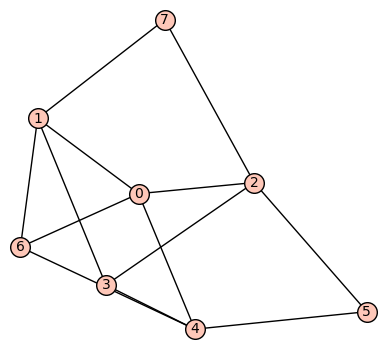

86
[{3, 5, 7}, {0, 5, 6}, {0, 6, 7}, {0, 3, 6}, {1, 2, 4}, {0, 5, 6, 7}, {0, 1, 2, 5}, {0, 2, 4, 7}, {3, 4, 5, 6}, {0, 1, 2, 4}, {0, 3, 4, 5}, {0, 3, 5, 6}, {1, 3, 6, 7}, {1, 2, 4, 5}, {1, 2, 5, 6}, {1, 2, 4, 6}, {1, 4, 5, 7}, {1, 2, 3, 4}, {0, 1, 3, 7}, {1, 2, 4, 7}, {0, 3, 6, 7}, {2, 4, 6, 7}, {0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {0, 3, 5, 6, 7}, {1, 3, 4, 5, 7}, {1, 4, 5, 6, 7}, {0, 2, 3, 4, 7}, {0, 1, 2, 4, 6}, {0, 1, 2, 4, 7}, {0, 3, 4, 5, 7}, {1, 2, 4, 5, 6}, {0, 1, 4, 5, 7}, {1, 2, 3, 4, 5}, {2, 3, 5, 6, 7}, {1, 2, 5, 6, 7}, {0, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {3, 4, 5, 6, 7}, {2, 3, 4, 6, 7}, {1, 3, 5, 6, 7}, {0, 2, 4, 5, 7}, {0, 1, 2, 3, 5}, {1, 2, 3, 4, 6}, {1, 2, 4, 6, 7}, {0, 2, 4, 6, 7}, {0, 1, 3, 6, 7}, {0, 1, 2, 4, 5}, {1, 2, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {0, 2, 3, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 2, 4, 5, 6, 7}, {0, 3, 4, 5, 6, 7}, {0, 1, 2, 3, 5, 7}, {0, 1, 4, 5, 6, 7}, {0, 2, 3, 4, 5, 

In [23]:
G.show()
A=sorted(All_Forts(G),key=len)
print len(A)
print sorted(A,key=len)

In [24]:
#create list of indices with unique representatives of some transversal of size 4
GI=GoodIndices4(A2)

In [25]:
len(GI)

769

In [27]:
print GI

[1813, 2725, 3296, 3303, 50404, 63416, 67453, 80727, 81003, 81315, 93814, 94391, 99265, 99295, 100544, 100546, 101649, 101710, 121061, 121068, 121097, 121098, 122148, 123393, 129809, 129811, 130229, 130231, 130686, 130690, 130702, 130711, 130721, 130919, 131081, 131235, 131244, 131254, 131333, 131334, 131394, 131395, 149929, 151945, 162583, 162682, 162753, 164288, 164349, 184300, 184399, 187319, 187326, 188733, 188904, 188911, 189633, 189831, 189949, 213021, 213051, 224666, 224668, 224814, 224831, 224838, 225771, 225832, 259935, 260615, 260811, 335302, 335315, 351317, 351500, 554590, 554594, 554615, 554625, 581639, 581763, 581782, 581784, 605674, 605711, 605819, 605829, 773079, 773083, 773092, 773127, 773820, 773864, 774581, 774594, 774685, 774767, 774894, 775127, 775763, 775770, 775799, 775800, 776310, 776340, 776759, 777211, 777228, 777255, 777402, 777410, 777761, 777788, 777978, 778032, 779334, 780579, 796905, 796935, 797265, 797457, 799244, 800463, 801387, 801400, 801786, 802408, 8

In [26]:
BP=BadPairs(A2)

In [29]:
print BP

[[0, 13], [1, 13], [2, 12], [2, 76], [6, 12], [6, 58], [9, 53], [11, 58], [12, 23], [12, 31], [12, 33], [12, 39], [12, 52], [12, 58], [12, 76], [13, 27], [13, 50], [13, 53], [13, 66], [13, 67], [14, 21], [18, 27], [18, 67], [20, 27], [20, 67], [21, 27], [21, 55], [21, 57], [21, 67], [21, 70], [21, 85], [22, 31], [27, 54], [27, 65], [27, 67], [27, 77], [27, 81], [28, 58], [29, 65], [29, 67], [36, 53], [36, 60], [37, 50], [39, 52], [41, 85], [42, 67], [46, 65], [46, 67], [46, 77], [48, 85], [50, 67], [50, 80], [53, 55], [53, 60], [54, 65], [54, 67], [54, 77], [55, 60], [55, 70], [55, 85], [58, 67], [60, 83], [65, 67], [65, 68], [65, 75], [65, 77], [65, 81], [67, 68], [67, 69], [67, 75], [67, 77], [67, 81], [67, 85], [70, 85]]


In [27]:
t=4
m=len(A2)
UFRI=Subsets(range(m),t)

In [38]:
#remove lists in GI with bad pairs
lenGI=len(GI)
lenBP=len(BP)


for m in GI:
    G=UFRI[m]
    for j in range(lenBP):
        BPset=set(BP[j])
        if BPset.issubset(G):
            if m in GI:
                GI.remove(m)
    

In [39]:
len(GI)

505

In [43]:
i=GI[504]
print UFRI[i]
UniqF=[A2[k] for k in UFRI[i]]
UniqF

{76, 66, 60, 81}


[{0, 1, 3, 7}, {0, 1, 2, 3, 5}, {0, 3, 6}, {0, 1, 2, 3, 4}]

In [46]:
EU=ExchangeUnions(UniqF)
EU

[{1, 2, 3, 5, 7},
 {0, 2, 3, 4, 7},
 {0, 1, 2, 5, 6},
 {1, 3, 6, 7},
 {0, 1, 6, 7},
 {0, 1, 2, 5, 7},
 {1, 2, 3, 5, 6},
 {0, 1, 2, 4, 6},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 4, 7},
 {0, 1, 2, 4, 7},
 {0, 1, 3, 4, 5},
 {0, 1, 2, 4, 5},
 {1, 2, 3, 4, 5},
 {0, 2, 3, 4, 5},
 {0, 2, 3, 5, 7}]

In [47]:
n=len(GI)
Bad_GI=[]

for i in range(n):
    print '========================================'
    print i
    iG=GI[i]
    UniqF=[A2[k] for k in UFRI[iG]]
    RF=ReqForts(UniqF,A2)
    
    print UniqF,'\n', RF
    
    Findex=[]
    for i in range(len(RF)):
        for j in range(len(A2)):
            if RF[i]==A2[j]:
                Findex.append(j)
    
        for j2 in range(lenBP):
            BPset=set(BP[j2])
            if BPset.issubset(Findex):
                print BP[j2],'incompatible'
                
            break;

0
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 2, 4}] 
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 2, 4}, {0, 3, 6}, {3, 5, 7}, {0, 5, 6}, {0, 5, 6}, {0, 6, 7}, {0, 3, 4, 5}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
1
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {1, 2, 4, 5}] 
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {1, 2, 4, 5}, {0, 3, 6}, {3, 5, 7}, {0, 5, 6}, {0, 5, 6}, {0, 6, 7}, {0, 3, 4, 5}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
2
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {1, 2, 4}] 
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {1, 2, 4}, {0, 3, 6}, {3, 5, 7}, {0, 5, 6}, {0, 5, 6}, {0, 6, 7}, {0, 3, 4, 5}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
3
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 2, 4, 5}] 
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 2, 4, 5}, {0, 3, 6}, {0, 1, 3, 7}, {3, 5, 7}, {0, 5, 6}, {0, 3, 4, 5}, {0, 6, 7}, {3, 5, 7}, {0, 5, 6}, {0, 3, 4, 5}]
4
[{0, 1, 2, 5, 6}, {1, 2, 4

48
[{0, 1, 3, 5, 7}, {0, 1, 4, 5, 7}, {0, 1, 2, 5}, {0, 6, 7}] 
[{0, 1, 3, 5, 7}, {0, 1, 4, 5, 7}, {0, 1, 2, 5}, {0, 6, 7}, {3, 5, 7}, {0, 3, 4, 5}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}]
49
[{0, 1, 3, 5, 7}, {0, 3, 5, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}] 
[{0, 1, 3, 5, 7}, {0, 3, 5, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}, {3, 5, 7}, {0, 3, 6}, {0, 3, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}]
50
[{0, 1, 3, 5, 7}, {0, 3, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}] 
[{0, 1, 3, 5, 7}, {0, 3, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}, {3, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}]
51
[{0, 1, 3, 5, 7}, {1, 4, 5, 7}, {0, 1, 2, 5}, {0, 6, 7}] 
[{0, 1, 3, 5, 7}, {1, 4, 5, 7}, {0, 1, 2, 5}, {0, 6, 7}, {3, 5, 7}, {0, 3, 4, 5}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}]
52
[{0, 1, 3, 5, 7}, {0, 3, 5, 6}, {0, 1, 2, 3, 5}, {0, 3, 4, 5}] 
[{0, 1, 3, 5, 7}, {0, 3, 5, 6}, {0, 1, 2, 3, 5}, {0, 3, 4, 5}, {3, 5, 7}, {0, 3, 6}, {0, 3, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0,

[{0, 5, 6, 7}, {1, 4, 5, 7}, {1, 2, 5, 6, 7}, {1, 3, 6, 7}] 
[{0, 5, 6, 7}, {1, 4, 5, 7}, {1, 2, 5, 6, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 6, 7}]
113
[{0, 5, 6, 7}, {1, 4, 5, 7}, {1, 3, 5, 6, 7}, {1, 2, 5, 6, 7}] 
[{0, 5, 6, 7}, {1, 4, 5, 7}, {1, 3, 5, 6, 7}, {1, 2, 5, 6, 7}, {3, 5, 7}, {0, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 6, 7}, {1, 3, 6, 7}, {1, 3, 6, 7}]
114
[{0, 5, 6, 7}, {1, 2, 5, 6}, {1, 4, 5, 7}, {1, 3, 6, 7}] 
[{0, 5, 6, 7}, {1, 2, 5, 6}, {1, 4, 5, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}]
115
[{0, 5, 6, 7}, {1, 4, 5, 7}, {3, 4, 5, 6, 7}, {2, 4, 5, 6, 7}] 
[{0, 5, 6, 7}, {1, 4, 5, 7}, {3, 4, 5, 6, 7}, {2, 4, 5, 6, 7}, {3, 4, 5, 6}, {0, 6, 7}, {0, 5, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}, {3, 5, 7}]
116
[{0, 5, 6, 7}, {1, 4, 5, 7}, {3, 4, 5, 6, 7}, {2, 4, 6, 7}] 
[{0, 5, 6, 7}, {1, 4, 5, 7}, {3, 4, 5, 6, 7}, {2, 4, 6, 7}, {3, 4, 5, 6}, {0, 6, 7}, {0, 5, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}, {3, 5, 7}]

176
[{1, 2, 5, 6}, {0, 1, 2, 3, 5}, {3, 5, 7}, {1, 2, 3, 4, 5}] 
[{1, 2, 5, 6}, {0, 1, 2, 3, 5}, {3, 5, 7}, {1, 2, 3, 4, 5}, {0, 3, 6}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 3, 4, 5}, {0, 3, 4, 5}]
177
[{1, 2, 3, 5, 6}, {0, 1, 2, 3, 5}, {3, 5, 7}, {1, 2, 3, 4, 5}] 
[{1, 2, 3, 5, 6}, {0, 1, 2, 3, 5}, {3, 5, 7}, {1, 2, 3, 4, 5}, {0, 3, 6}, {3, 4, 5, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {1, 3, 6, 7}, {0, 3, 4, 5}, {0, 3, 4, 5}]
178
[{2, 4, 5, 6, 7}, {3, 5, 7}, {1, 2, 5, 6, 7}, {0, 5, 6}] 
[{2, 4, 5, 6, 7}, {3, 5, 7}, {1, 2, 5, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 6, 7}]
179
[{2, 4, 5, 6, 7}, {3, 5, 7}, {1, 2, 5, 6, 7}, {0, 6, 7}] 
[{2, 4, 5, 6, 7}, {3, 5, 7}, {1, 2, 5, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 5, 6}]
180
[{3, 5, 7}, {1, 2, 5, 6, 7}, {2, 4, 6, 7}, {0, 5, 6}] 
[{3, 5, 7}, {1, 2, 5, 6, 7}, {2, 4, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 6, 7}]
181
[{2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {3, 5, 7}, {0, 2, 4, 5, 7}] 
[{2, 4, 5, 6, 7}, 

[{0, 2, 4, 5, 7}, {0, 1, 2, 4}, {0, 2, 4, 6, 7}, {0, 2, 3, 4, 7}] 
[{0, 2, 4, 5, 7}, {0, 1, 2, 4}, {0, 2, 4, 6, 7}, {0, 2, 3, 4, 7}, {0, 6, 7}, {0, 1, 3, 7}, {0, 3, 6}, {3, 5, 7}, {0, 5, 6}, {0, 6, 7}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
230
[{0, 2, 4, 5, 7}, {0, 1, 2, 4}, {2, 4, 6, 7}, {0, 2, 3, 4, 7}] 
[{0, 2, 4, 5, 7}, {0, 1, 2, 4}, {2, 4, 6, 7}, {0, 2, 3, 4, 7}, {0, 6, 7}, {0, 1, 3, 7}, {0, 5, 6}, {0, 3, 6}, {3, 5, 7}, {0, 6, 7}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
231
[{0, 6, 7}, {0, 1, 3, 7}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}] 
[{0, 6, 7}, {0, 1, 3, 7}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}, {3, 5, 7}, {1, 3, 6, 7}, {0, 3, 6}, {0, 3, 6}, {3, 5, 7}]
232
[{1, 2, 3, 4}, {0, 3, 6}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}] 
[{1, 2, 3, 4}, {0, 3, 6}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}, {3, 5, 7}]
233
[{1, 2, 4}, {0, 3, 6}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}] 
[{1, 2, 4}, {0, 3, 6}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3

[{0, 5, 6}, {0, 1, 4, 5, 7}, {0, 2, 4, 7}, {0, 3, 4, 5}] 
[{0, 5, 6}, {0, 1, 4, 5, 7}, {0, 2, 4, 7}, {0, 3, 4, 5}, {0, 3, 6}, {0, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}, {3, 5, 7}, {3, 5, 7}]
283
[{0, 5, 6}, {0, 2, 4, 7}, {1, 2, 4, 5}, {0, 3, 4, 5}] 
[{0, 5, 6}, {0, 2, 4, 7}, {1, 2, 4, 5}, {0, 3, 4, 5}, {0, 3, 6}, {3, 4, 5, 6}, {3, 5, 7}, {3, 5, 7}]
284
[{0, 5, 6}, {1, 4, 5, 7}, {0, 2, 4, 7}, {0, 3, 4, 5}] 
[{0, 5, 6}, {1, 4, 5, 7}, {0, 2, 4, 7}, {0, 3, 4, 5}, {0, 3, 6}, {0, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}, {3, 5, 7}]
285
[{0, 5, 6}, {0, 1, 2, 4, 5}, {0, 2, 4, 7}, {0, 3, 4, 5}] 
[{0, 5, 6}, {0, 1, 2, 4, 5}, {0, 2, 4, 7}, {0, 3, 4, 5}, {0, 3, 6}, {3, 4, 5, 6}, {3, 5, 7}, {3, 5, 7}]
286
[{1, 2, 3, 4}, {0, 3, 6}, {0, 2, 4, 7}, {0, 3, 4, 5}] 
[{1, 2, 3, 4}, {0, 3, 6}, {0, 2, 4, 7}, {0, 3, 4, 5}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}, {3, 5, 7}]
287
[{0, 1, 3, 7}, {0, 3, 6}, {0, 2, 4, 7}, {0, 3, 4, 5}] 
[{0, 1, 3, 7}, {0, 3, 6}, {0, 2, 4, 7}, {0, 3, 4, 5}, {

[{1, 2, 3, 5, 6}, {2, 3, 5, 6, 7}, {0, 3, 5, 6}, {3, 4, 5, 6}] 
[{1, 2, 3, 5, 6}, {2, 3, 5, 6, 7}, {0, 3, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 3, 4, 5}, {0, 3, 6}, {3, 5, 7}, {1, 3, 6, 7}, {0, 5, 6}, {3, 5, 7}]
317
[{2, 3, 5, 6, 7}, {1, 3, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}] 
[{2, 3, 5, 6, 7}, {1, 3, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 3, 4, 5}, {3, 5, 7}, {3, 5, 7}]
318
[{2, 3, 5, 6, 7}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}] 
[{2, 3, 5, 6, 7}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 6}, {3, 5, 7}, {3, 5, 7}]
319
[{2, 3, 5, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {3, 4, 5, 6}] 
[{2, 3, 5, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 3, 4, 5}, {0, 5, 6}, {3, 5, 7}, {3, 5, 7}]
320
[{2, 3, 5, 6, 7}, {0, 3, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}] 
[{2, 3, 5, 6, 7}, {0, 3, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 3, 6}, {3, 5, 7}, {3, 5, 7}]
321
{0, 1, 2, 6} incompatible

{0, 1, 2, 6} incompatible
[{1, 2, 5, 6}, {1, 3, 5, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}] 
[{1, 2, 5, 6}, {1, 3, 5, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 3, 4, 5}, {1, 3, 6, 7}, {1, 3, 6, 7}, {0, 1, 2, 5}]
359
[{0, 3, 6}, {1, 2, 5, 6}, {1, 3, 5, 6, 7}, {3, 4, 5, 6}] 
[{0, 3, 6}, {1, 2, 5, 6}, {1, 3, 5, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {1, 3, 6, 7}, {0, 3, 4, 5}, {1, 3, 6, 7}, {0, 5, 6}]
360
{0, 1, 2, 6} incompatible
[{1, 2, 5, 6}, {1, 4, 5, 7}, {0, 5, 6}, {3, 4, 5, 6}] 
[{1, 2, 5, 6}, {1, 4, 5, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 3, 6}, {0, 6, 7}, {0, 3, 4, 5}, {1, 3, 6, 7}, {0, 1, 2, 5}]
361
{0, 1, 2, 6} incompatible
[{1, 2, 5, 6}, {0, 5, 6}, {2, 4, 6, 7}, {3, 4, 5, 6}] 
[{1, 2, 5, 6}, {0, 5, 6}, {2, 4, 6, 7}, {3, 4, 5, 6}, {0, 3, 6}, {0, 3, 4, 5}, {3, 5, 7}, {0, 1, 2, 5}]
362
[{1, 2, 3, 5, 6}, {1, 3, 5, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}] 
[{1, 2, 3, 5, 6}, {1, 3, 5, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 3, 4, 5}, {0, 3, 6}, {1, 3, 6, 7}, {1, 3, 6, 7}]
363
[{

[{1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 3, 4, 6}, {1, 2, 4, 6, 7}] 
[{1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 3, 4, 6}, {1, 2, 4, 6, 7}, {3, 4, 5, 6}, {0, 3, 6}, {0, 6, 7}, {1, 3, 6, 7}, {0, 5, 6}, {0, 5, 6}, {3, 4, 5, 6}, {0, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {0, 3, 6}]
396
[{1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 3, 4, 6}, {2, 4, 6, 7}] 
[{1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 3, 4, 6}, {2, 4, 6, 7}, {3, 4, 5, 6}, {0, 3, 6}, {0, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {3, 4, 5, 6}, {0, 5, 6}, {0, 6, 7}, {1, 3, 6, 7}, {0, 5, 6}, {0, 3, 6}]
397
[{1, 4, 5, 7}, {0, 1, 2, 4}, {0, 1, 3, 7}, {0, 6, 7}] 
[{1, 4, 5, 7}, {0, 1, 2, 4}, {0, 1, 3, 7}, {0, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {0, 3, 4, 5}, {0, 5, 6}]
398
[{1, 2, 3, 4, 7}, {1, 4, 5, 7}, {0, 1, 2, 4}, {1, 2, 4, 6, 7}] 
[{1, 2, 3, 4, 7}, {1, 4, 5, 7}, {0, 1, 2, 4}, {1, 2, 4, 6, 7}, {3, 5, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 6, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}]
399
[{1, 2, 3, 4, 7}, {1, 4, 5, 7}, {0, 1, 2, 4}, {2, 4, 6, 7}] 
[{1, 2, 3, 4, 7}, {1, 4

[{1, 2, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 4, 6}, {0, 5, 6}] 
[{1, 2, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 4, 6}, {0, 5, 6}, {3, 5, 7}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 3, 6}]
460
[{1, 2, 3, 5, 6}, {1, 2, 4}, {1, 2, 5, 6, 7}, {0, 5, 6}] 
[{1, 2, 3, 5, 6}, {1, 2, 4}, {1, 2, 5, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 3, 6}]
461
[{2, 3, 4, 6, 7}, {0, 6, 7}, {3, 4, 5, 6, 7}, {1, 3, 6, 7}] 
[{2, 3, 4, 6, 7}, {0, 6, 7}, {3, 4, 5, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 3, 6}, {0, 3, 6}, {3, 5, 7}]
462
[{2, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {0, 3, 6}, {1, 3, 6, 7}] 
[{2, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {0, 3, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 6, 7}, {3, 5, 7}, {3, 4, 5, 6}]
463
[{2, 3, 4, 6, 7}, {0, 3, 6, 7}, {3, 4, 5, 6, 7}, {1, 3, 6, 7}] 
[{2, 3, 4, 6, 7}, {0, 3, 6, 7}, {3, 4, 5, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 4, 5, 6}, {0, 6, 7}, {0, 1, 3, 7}, {0, 3, 6}, {0, 3, 6}, {3, 5, 7}]
464


[{0, 1, 2, 3, 4}, {1, 2, 3, 4, 7}, {1, 2, 3, 4, 6}, {1, 2, 4, 5}] 
[{0, 1, 2, 3, 4}, {1, 2, 3, 4, 7}, {1, 2, 3, 4, 6}, {1, 2, 4, 5}, {0, 3, 6}, {1, 3, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 3, 4, 5}, {0, 3, 4, 5}, {0, 3, 6}, {1, 3, 6, 7}, {3, 5, 7}, {0, 3, 6}, {3, 5, 7}]
498
{0, 1, 2, 6} incompatible
[{1, 2, 5, 6}, {1, 4, 5, 7}, {1, 3, 5, 6, 7}, {0, 5, 6}] 
[{1, 2, 5, 6}, {1, 4, 5, 7}, {1, 3, 5, 6, 7}, {0, 5, 6}, {3, 5, 7}, {0, 6, 7}, {3, 4, 5, 6}, {1, 3, 6, 7}, {1, 3, 6, 7}, {0, 1, 2, 5}]
499
[{1, 2, 5, 6}, {1, 3, 5, 6, 7}, {1, 4, 5, 7}, {0, 6, 7}] 
[{1, 2, 5, 6}, {1, 3, 5, 6, 7}, {1, 4, 5, 7}, {0, 6, 7}, {3, 5, 7}, {0, 5, 6}, {3, 4, 5, 6}, {1, 3, 6, 7}, {1, 3, 6, 7}]
500
[{1, 2, 3, 4}, {1, 2, 5, 6}, {0, 1, 2, 4, 5}, {1, 4, 5, 7}] 
[{1, 2, 3, 4}, {1, 2, 5, 6}, {0, 1, 2, 4, 5}, {1, 4, 5, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 5, 6}, {0, 3, 4, 5}, {3, 4, 5, 6}, {0, 5, 6}, {3, 5, 7}, {0, 3, 4, 5}]
501
{2, 4, 5, 7} incompatible
{1, 2, 5, 7} incompatible
[{1, 4, 5, 7}

In [56]:


iG=130686
UniqF=[A2[k] for k in UFRI[iG]]
U=ReqForts(UniqF,A2)
NUS=ExchangeUnions(U)
print '============================================================================='
print iG
print U
print NUS

#tells you what elements are available to fulfill the exchange property of circuits

n=len(U)
m=len(NUS)

print

for j in range(m):
    if (not( any( u.issubset(NUS[j]) for u in U) ) ):
        print j,NUS[j],'\n','------------------'
        Y=NUS[j]
        if (not ( any(f.issubset(Y) for f in A2) ) ):
            print 'incompatible'
        break
            for f in A2:
                if f.issubset(Y):
                    print f


130686
[{0, 1, 2, 5, 7}, {1, 2, 4, 5, 7}, {3, 5, 7}, {1, 2, 5, 6, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}, {0, 6, 7}]
[{0, 1, 2, 5, 6}, {0, 1, 3, 5}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 1, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {1, 2, 3, 6, 7}, {0, 1, 2, 6, 7}, {0, 1, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 2, 4, 5}, {0, 1, 2, 3, 4, 5}, {0, 2, 3, 5, 6, 7}, {0, 1, 3, 7}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {0, 2, 3, 4, 5, 7}, {0, 3, 6, 7}, {0, 2, 5, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 3, 5, 6}, {0, 2, 4, 5, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {0, 1, 2, 3, 5, 6}, {2, 3, 4, 5, 6, 7}, {2, 4, 5, 6, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {1, 2, 3, 5, 6}, {2, 3, 5, 6, 7}]

0 {0, 1, 2, 5, 6} 
------------------
1 {0, 1, 3, 5} 
------------------
incompatible
2 {0, 1, 2, 4, 5, 6} 
------------------
5 {0, 1, 2, 3, 5} 
------------------
6 {0, 1, 5, 7} 
------------------
incompatible
7 {1,

In [57]:
n=len(GI)

for i in range(n):
    iG=GI[i]
    UniqF=[A2[k] for k in UFRI[iG]]
    U=ReqForts(UniqF,A2)
    NUS=ExchangeUnions(U)
    print '============================================================================='
    print iG
    print U
    print NUS

    #tells you what elements are available to fulfill the exchange property of circuits

    n=len(U)
    m=len(NUS)

    print

    for j in range(m):
        if (not( any( u.issubset(NUS[j]) for u in U) ) ):
            #print j,NUS[j],'\n','------------------'
            Y=NUS[j]
            if (not ( any(f.issubset(Y) for f in A2) ) ):
                print 'incompatible'
                break
#             for f in A2:
#                 if f.issubset(Y):
#                     print f

            

1813
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 2, 4}, {0, 3, 6}, {3, 5, 7}, {0, 5, 6}, {0, 5, 6}, {0, 6, 7}, {0, 3, 4, 5}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
[{0, 1, 2, 3, 6}, {5, 7}, {0, 1, 2, 5, 6}, {0, 1, 3, 5}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {3, 7}, {0, 1, 2, 5}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 1, 2, 6}, {1, 2, 3, 4, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {3, 4, 5, 6, 7}, {0, 2, 4, 5, 6}, {0, 1, 3, 4, 5}, {0, 1, 2, 3, 6, 7}, {0, 1, 2, 6, 7}, {1, 2, 5, 6}, {0, 1, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {5, 6}, {0, 1, 2, 4, 5}, {3, 5, 6}, {0, 2, 3, 5, 6, 7}, {0, 6}, {3, 5}, {0, 1, 3, 6}, {0, 5}, {0, 1, 4, 5, 6}, {0, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 3, 4}, {0, 2, 3, 5, 6}, {0, 4, 5, 7}, {0, 2, 5, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 1, 3, 5, 6}, {0, 2, 

101649
[{0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {1, 4, 5, 7}, {0, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 6, 7}, {3, 5, 7}, {0, 3, 4, 5}]
[{5, 7}, {0, 1, 2, 5, 6}, {0, 1, 3, 5}, {6, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {3, 7}, {0, 1, 5, 7}, {0, 6}, {0, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {3, 4, 5, 6, 7}, {0, 1, 3}, {1, 3, 5, 7}, {0, 1, 3, 4, 5}, {0, 1, 2, 6, 7}, {0, 3, 5, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 2, 4, 5}, {0, 1, 7}, {0, 1, 3, 6, 7}, {0, 1, 3, 7}, {3, 5}, {1, 3, 7}, {0, 1, 3, 6}, {0, 1, 4, 5, 6}, {0, 1, 4, 6, 7}, {0, 5, 7}, {0, 3, 6, 7}, {1, 3, 4, 5}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 1, 3, 5, 6}, {0, 2, 4, 5, 7}, {1, 3, 6, 7}, {0, 3, 4, 7}, {0, 7}, {0, 1, 3, 4, 7}, {1, 3, 4, 7}, {5, 6, 7}, {1, 2, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {0, 3, 4, 5, 7}]

incompatible
101710
[{0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {1, 4, 5, 7}, {0, 6, 7}, {3, 5, 7}, {0, 1, 3, 7}, {0

131394
[{0, 1, 2, 5, 7}, {3, 5, 7}, {0, 2, 4, 5, 7}, {0, 6, 7}, {0, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}]
[{0, 1, 2, 5, 6}, {0, 1, 3, 5}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {0, 4, 5, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {0, 2, 4, 5, 6}, {0, 1, 2, 6, 7}, {0, 2, 4, 6, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 2, 4, 5}, {3, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {0, 5, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 2, 3, 4, 7}, {1, 3, 6, 7}, {0, 3, 4, 7}, {2, 4, 5, 6, 7}, {5, 6, 7}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {0, 2, 3, 4, 5}]

incompatible
149929
[{0, 1, 3, 7}, {0, 1, 2, 5, 7}, {0, 1, 2, 4, 7}, {0, 6, 7}, {3, 5, 7}, {1, 3, 6, 7}, {0, 3, 6}, {3, 5, 7}]
[{5, 7}, {0, 1, 2, 5, 6}, {0, 1, 3, 5}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {3, 7}, {0, 1, 5, 7}, {0, 1, 2, 4, 6}, {0, 1, 2, 3, 4, 6}, {1, 2, 4, 6, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 2, 3, 4, 6, 7}, {0, 1, 2

224814
[{0, 1, 3, 5, 7}, {0, 3, 5, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}, {3, 5, 7}, {0, 3, 6}, {0, 3, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}]
[{0, 1, 2, 3, 6}, {5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 6}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 5, 7}, {0, 3, 5}, {0, 6}, {0, 1, 2, 3, 4, 6}, {0, 1, 2, 6}, {0, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {1, 3, 5, 7}, {1, 3, 7}, {3, 5}, {0, 3, 5, 7}, {1, 2, 5, 6}, {0, 1, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 1, 3, 6, 7}, {0, 1, 7}, {0, 5, 6}, {3, 5, 6}, {0, 2, 3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 4, 6, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {0, 3}, {1, 3, 6, 7}, {0, 1, 6, 7}, {0, 1, 3}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {0, 3, 6}, {0, 4, 5, 6}]

incompatible
224838
[{0, 1, 3, 5, 7}, {0, 3, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}, {3, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 5, 

581639
[{0, 3, 4, 5}, {1, 2, 3, 4, 5}, {1, 3, 4, 5, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 1, 3, 7}, {3, 5, 7}, {0, 5, 6}, {1, 3, 6, 7}]
[{5, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {1, 2, 4, 5, 6}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {0, 1, 3, 4, 6, 7}, {0, 1, 3, 5}, {1, 2, 3, 4, 6}, {0, 1, 2, 4, 5, 6}, {0, 4, 5, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 1, 3, 4, 5}, {1, 4, 5, 6, 7}, {3, 5}, {1, 2, 4, 5, 6, 7}, {0, 1, 2, 4, 5, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 4, 5, 7}, {0, 1, 2, 4, 5}, {1, 4, 5, 7}, {3, 5, 6}, {3, 4, 5, 6, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 5, 6, 7}, {0, 3, 6, 7}, {1, 3, 4, 5}, {0, 3, 5, 6}, {1, 3, 5, 6}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {1, 3, 4, 7}, {0, 3, 5}, {0, 4, 5, 6}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 3, 4, 6}, {1, 3, 4, 6, 7}, {0,

773127
[{0, 5, 6, 7}, {1, 4, 5, 6, 7}, {3, 5, 7}, {2, 4, 6, 7}, {3, 4, 5, 6}, {0, 6, 7}, {0, 5, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}]
[{0, 5}, {0, 1, 3, 7}, {5, 6}, {0, 1, 3, 5, 7}, {1, 2, 3, 4, 7}, {4, 5, 6}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 6}, {0, 2, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 4, 5, 6}, {1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {2, 3, 4, 5, 7}, {0, 5, 6}, {3, 5, 6}, {2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {3, 4, 6}, {0, 3, 4, 5}, {0, 3, 4, 6}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 2, 4, 5, 7}, {0, 5, 7}, {0, 3, 6, 7}, {0, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 1, 3, 5, 6}, {1, 3, 5, 6}, {0, 1, 4, 6, 7}, {1, 5, 6, 7}, {3, 4, 5}, {5, 6, 7}, {1, 2, 4, 5, 7}, {0, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {0, 2, 4, 7}, {0, 3, 4, 5, 7}]

incompatible
773820
[{0, 5, 6, 7}, {1, 4, 5, 6, 7}, {2, 4, 5, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}, {1, 3, 6, 7}, {0, 5, 6}, {0, 6, 7}, {3, 5, 7}]
[{5, 6}, {0, 1, 3, 5, 7}, {1, 2, 3, 4, 5, 6}, {

799244
[{0, 5, 6, 7}, {0, 1, 4, 5, 7}, {0, 3, 4, 5, 7}, {0, 2, 4, 5, 7}, {3, 5, 7}, {0, 6, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {0, 5, 6}, {0, 5, 6}, {0, 3, 4, 5}, {3, 5, 7}]
[{5, 7}, {3, 4, 5, 7}, {3, 7}, {0, 1, 3, 5}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {5, 6}, {0, 1, 3, 5, 7}, {0, 1, 5, 7}, {0, 3, 5}, {0, 4, 5, 7}, {0, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 5}, {0, 6}, {0, 3, 4, 6}, {0, 2, 4, 5, 6}, {0, 1, 3, 4, 5}, {0, 5}, {3, 5}, {0, 3, 5, 7}, {0, 1, 4, 5, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 2, 4, 5}, {1, 2, 3, 4, 5, 7}, {0, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {0, 1, 4, 5, 6}, {0, 5, 7}, {0, 3, 6, 7}, {0, 3, 4}, {0, 6, 7}, {0, 3, 5, 6}, {0, 1, 3, 5, 6}, {0, 2, 3, 4, 7}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 4, 5}, {3, 4, 5}, {0, 3, 4, 7}, {0, 3, 4, 5, 6}, {0, 1, 3, 4, 7}, {2, 4, 5, 6, 7}, {5, 6, 7}, {1, 2, 4, 5, 7}, {0, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 2, 3, 4, 5}, {0, 3, 4, 5, 7}]

incompatible
800463
[{0, 5, 6, 7}, {1, 4, 5, 

822221
[{0, 5, 6, 7}, {1, 4, 5, 7}, {1, 2, 5, 6, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 6, 7}]
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {6, 7}, {0, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {1, 2, 3, 6, 7}, {0, 1, 2, 6, 7}, {1, 3, 5, 6, 7}, {1, 2, 3, 4, 5, 7}, {0, 5, 6}, {2, 3, 5, 6, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 5, 7}, {0, 3, 6, 7}, {1, 3, 4, 5}, {0, 6, 7}, {0, 3, 5, 6}, {0, 1, 3, 5, 6}, {1, 3, 5, 6}, {0, 1, 4, 6, 7}, {1, 5, 6, 7}, {1, 2, 3, 5, 6}, {2, 4, 5, 6, 7}, {1, 3, 4, 7}, {5, 6, 7}, {0, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {0, 7}, {1, 2, 3, 4, 6, 7}, {0, 3, 4, 5, 7}]

incompatible
822728
[{0, 5, 6, 7}, {1, 4, 5, 7}, {1, 3, 5, 6, 7}, {1, 2, 5, 6, 7}, {3, 5, 7}, {0, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 6, 7}, {1, 3, 6, 7}, {1, 3, 6, 7}]
[{0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 3, 5, 7}, {6

909756
[{2, 4, 5, 6, 7}, {1, 4, 5, 6, 7}, {3, 5, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}]
[{3, 4, 6}, {5, 6}, {0, 1, 3, 5, 7}, {4, 5, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 6}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 4, 5, 6}, {0, 5}, {0, 2, 4, 6, 7}, {1, 3, 5, 6, 7}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {3, 5, 6}, {2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 1, 4, 6, 7}, {0, 5, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 3, 5, 6}, {0, 2, 4, 5, 7}, {1, 5, 6, 7}, {3, 4, 5}, {5, 6, 7}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 5, 7}, {3, 4, 5, 6, 7}, {0, 3, 4, 5, 7}]

incompatible
{0, 1, 2, 6} incompatible
910105
[{1, 2, 5, 6}, {1, 4, 5, 6, 7}, {3, 5, 7}, {0, 5, 6}, {0, 6, 7}, {3, 4, 5, 6}, {1, 3, 6, 7}, {1, 3, 6, 7}, {0, 1, 2, 5}]
[{0, 2, 5, 6}, {0, 1, 2, 5, 7}, {2, 4, 5, 6, 7}, {0, 1, 3, 

957253
[{0, 6, 7}, {1, 4, 5, 6, 7}, {1, 2, 4, 6}, {1, 3, 6, 7}, {0, 1, 3, 7}, {0, 3, 6}, {0, 5, 6}, {3, 4, 5, 6}]
[{0, 1, 3, 5, 7}, {1, 2, 3, 4, 7}, {0, 3, 5}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 3, 4, 6}, {0, 1, 4, 5, 6, 7}, {2, 3, 4, 6, 7}, {1, 3, 5, 6, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {3, 4, 5, 6, 7}, {0, 1, 3, 7}, {1, 3, 4, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {0, 1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 5, 7}, {0, 3, 6, 7}, {1, 2, 5, 6, 7}, {0, 2, 3, 4, 6, 7}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {1, 2, 4, 5, 7}, {0, 3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 3, 4, 5, 7}]

incompatible
957295
[{0, 6, 7}, {1, 2, 4}, {1, 4, 5, 6, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}, {0, 3, 6}, {0, 5, 6}, {3, 4, 5, 6}]
[{0, 1, 3, 5, 7}, {0, 3, 5}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 1, 3, 4, 5, 7}, {0, 3, 4, 6}, {0, 1, 4, 5, 6, 7}, {2, 3, 4, 6, 7

975021
[{0, 2, 4, 5, 7}, {3, 5, 7}, {0, 1, 2, 5}, {0, 6, 7}, {0, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}]
[{0, 1, 3, 5}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 5, 7}, {0, 1, 2, 6}, {0, 4, 5, 7}, {0, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {0, 2, 4, 5, 6}, {0, 1, 4, 5, 7}, {1, 2, 5, 6}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {1, 2, 3, 4, 5}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {0, 5, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 2, 3, 4, 7}, {1, 3, 6, 7}, {0, 3, 4, 7}, {0, 1, 2, 3, 4}, {2, 4, 5, 6, 7}, {5, 6, 7}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 5, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 2, 3, 4, 5}]

incompatible
975289
[{1, 2, 3, 5, 6}, {1, 2, 3, 4}, {3, 5, 7}, {0, 1, 2, 5}, {3, 4, 5, 6}, {0, 3, 6}, {1, 3, 6, 7}, {0, 3, 4, 5}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}]
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 1, 3, 5}, {1, 2, 4, 5, 6}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {0, 1, 4, 5, 6, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, 

992786
[{2, 3, 4, 6, 7}, {3, 5, 7}, {0, 2, 4, 7}, {1, 2, 4, 7}, {3, 4, 5, 6}, {1, 3, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {0, 3, 4, 5}]
[{0, 1, 2, 7}, {0, 4, 5, 6}, {3, 4, 5, 6}, {0, 2, 4, 5, 6, 7}, {0, 2, 3, 6, 7}, {1, 3, 7}, {0, 1, 4, 5, 6, 7}, {1, 2, 3, 4, 6}, {1, 2, 4, 6, 7}, {0, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 2, 4, 6, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {0, 1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 3, 4, 6}, {1, 2, 3, 6, 7}, {0, 2, 3, 5, 7}, {2, 3, 4, 5, 7}, {0, 2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 1, 3, 7}, {1, 6, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {1, 3, 4, 6, 7}, {0, 5, 6, 7}, {0, 3, 5, 6}, {1, 2, 3, 5, 6, 7}, {0, 2, 3, 4, 7}, {1, 3, 5, 6}, {0, 1, 6, 7}, {1, 5, 6, 7}, {0, 3, 4, 7}, {2, 4, 5, 6, 7}, {0, 1, 4, 7}, {0, 1, 2, 4}, {1, 3, 6}, {3, 6, 7}, {0, 3, 4, 6, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 3, 4, 6}, {2, 3, 5, 6, 7}, {0, 2, 3, 4, 5}]

incompatible
1005340
[{0, 1, 4, 5, 7}, {3, 5, 7}, {0, 5, 6}, {0, 2, 4, 5, 7}, {0, 6, 7}, {0, 3, 4, 5}, {0, 1, 3, 7}, {0, 3, 4

1021111
[{2, 4, 5, 6, 7}, {3, 5, 7}, {1, 2, 4, 5}, {0, 2, 4, 5, 7}, {3, 4, 5, 6}, {0, 3, 4, 5}, {0, 5, 6}]
[{0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 4, 6, 7}, {0, 4, 5, 7}, {0, 2, 4, 6, 7}, {0, 2, 3, 4, 6, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 4, 5, 6}, {0, 1, 4, 5, 7}, {2, 3, 4, 6, 7}, {0, 2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 1, 2, 4, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {2, 3, 4, 5, 7}, {0, 3, 6, 7}, {0, 2, 5, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 2, 3, 4, 7}, {0, 2, 3, 5, 7}, {0, 2, 4, 5, 7}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {1, 2, 3, 4, 7}, {0, 4, 5, 6, 7}, {2, 3, 5, 6, 7}, {0, 2, 3, 4, 5}]

incompatible
{0, 1, 2, 6} incompatible
1021253
[{2, 4, 5, 6, 7}, {1, 2, 5, 6}, {3, 5, 7}, {0, 5, 6}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 1, 2, 5}]
[{0, 2, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 5}, {1, 2, 4, 6, 7}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {0, 1,

1033997
[{1, 2, 3, 5, 6}, {0, 1, 2, 3, 5}, {1, 2, 4}, {3, 5, 7}, {0, 3, 6}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 3, 4, 5}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}]
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 1, 3, 5}, {1, 2, 4, 5, 6}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {0, 1, 4, 5, 6, 7}, {0, 3, 5}, {0, 1, 2, 3, 4, 6}, {0, 1, 2, 4, 5, 6}, {0, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 1, 4, 5, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 1, 3, 4, 5}, {1, 2, 3, 6, 7}, {1, 2, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {0, 2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 1, 3, 7}, {0, 4, 5}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 5, 6}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 3, 4}, {0, 2, 3, 5, 6}, {4, 5, 6}, {0, 3, 5, 6}, {0, 1, 2, 5, 6, 7}, {0, 1, 3, 5, 6}, {0, 2, 3, 4, 7}, {1, 3, 5, 6}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {3, 4, 5}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 4, 5, 6},

1058977
[{1, 2, 4, 5, 6}, {1, 4, 5, 7}, {0, 1, 2, 5}, {1, 2, 3, 4, 5}, {3, 4, 5, 6}, {3, 5, 7}, {3, 5, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 5, 6}, {0, 3, 4, 5}, {0, 3, 4, 5}]
[{5, 7}, {3, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {4, 5, 6}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 1, 2, 6}, {0, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 4, 5, 6}, {0, 1, 3, 4, 5}, {0, 5}, {3, 5}, {1, 2, 5, 6}, {1, 3, 5, 6, 7}, {1, 3, 4, 6, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {2, 3, 4, 5, 6}, {3, 4, 6}, {0, 3, 4, 5}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 1, 4, 6, 7}, {0, 3, 6, 7}, {1, 3, 4, 5}, {5, 6}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 6}, {0, 2, 4, 5, 7}, {0, 3, 4}, {0, 4, 5}, {3, 4, 5}, {0, 3, 4, 7}, {0, 1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {2, 4, 5, 6, 7}, {1, 3, 4, 7}, {0, 4, 5, 6}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3

[{0, 1, 2, 3, 6}, {5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 6}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 2, 3, 4, 6}, {0, 1, 2, 6}, {0, 4, 5, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {3, 5}, {1, 2, 5, 6}, {0, 1, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 5, 6}, {3, 5, 6}, {0, 6}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {0, 3}, {1, 3, 6, 7}, {0, 1, 6, 7}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 3, 6}, {0, 4, 5, 6}]

incompatible
1069651
[{0, 1, 3, 7}, {0, 3, 6}, {0, 1, 2, 5}, {0, 3, 4, 5}, {3, 5, 7}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}, {3, 5, 7}]
[{5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 3, 5, 7}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 2, 3, 4, 6}, {0, 1, 2, 6}, {0, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {1, 4, 5, 6, 7}, {3, 

1111899
[{0, 1, 3, 7}, {0, 3, 6}, {0, 3, 4, 5, 7}, {0, 2, 3, 4, 7}, {3, 5, 7}, {1, 3, 6, 7}, {0, 6, 7}, {0, 3, 4, 5}, {0, 3, 4, 5}, {3, 5, 7}]
[{5, 7}, {3, 4, 5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 4, 5, 6}, {1, 3, 5, 6}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 2, 3, 4, 6}, {0, 1, 2, 4, 6, 7}, {0, 4, 5, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 3, 4, 5}, {3, 5}, {0, 3, 5, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {3, 4, 5, 6, 7}, {0, 1, 3, 7}, {0, 1, 2, 4, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {0, 1, 3, 4, 5, 6}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 3, 4}, {0, 3, 5, 6}, {0, 4, 5}, {0, 2, 3, 5, 7}, {0, 2, 4, 5, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {3, 4, 5}, {0, 3, 4, 7}, {0, 1, 2, 3, 4}, {0, 4, 5, 6}, {3, 6, 7}, {1, 2, 3, 4, 7}, {0, 4, 5, 6, 7}, {0, 2, 3, 4, 6}, {0, 3, 4, 5, 6}, {0, 2, 3, 4, 5}]

incompatible
1112170
[{0, 3, 6, 7}, {0, 1, 3, 7}, {0, 3, 4, 5, 7}, {0, 2, 3, 4, 7}, {1, 3, 6, 7}, {0, 6, 7}, {0, 3, 6}, {0, 3, 6}, {3, 5, 7}, {0, 3, 4, 5}, {0, 3

1126797
[{1, 2, 4}, {0, 3, 6}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 5, 6}, {3, 5, 7}, {3, 5, 7}]
[{5, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 3, 5}, {1, 3, 4, 5, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {2, 3, 4, 6, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {1, 3, 7}, {3, 5}, {0, 1, 4, 5, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 7}, {3, 5, 6}, {0, 2, 3, 5, 6, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {2, 3, 4, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 4, 5, 7}, {0, 3, 5, 6}, {0, 2, 3, 4, 7}, {0, 2, 4, 5, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {0, 1, 3}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {0, 2, 4, 5, 6, 7}, {0, 4, 5, 6}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {0, 2, 3, 4, 5}]

incompatible
1126806
[{0, 1, 3, 7}, {0, 3, 6}, {0, 2, 3, 4, 7}, {0, 3, 4, 5}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 5, 6}, {3, 5, 7}]
[{5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 4, 5, 6

{1, 2, 6, 7} incompatible
{1, 4, 6, 7} incompatible
1148615
[{0, 2, 4, 5, 7}, {1, 2, 4, 7}, {0, 2, 3, 4, 7}, {2, 4, 6, 7}, {0, 1, 3, 7}, {3, 5, 7}, {0, 5, 6}, {0, 3, 6}, {3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}]
[{5, 7}, {3, 7}, {0, 1, 3, 4, 7}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 2, 3, 6, 7}, {0, 1, 5, 7}, {1, 4, 6, 7}, {0, 3, 5}, {0, 1, 3, 5}, {0, 1, 2, 3, 4, 6}, {1, 3, 4, 5, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 5}, {0, 1, 2, 3, 5, 7}, {1, 3, 7}, {0, 1, 3}, {0, 2, 4, 5, 6}, {0, 2, 3, 4, 6}, {3, 5}, {1, 2, 6, 7}, {0, 1, 4, 5, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 2, 4, 5}, {0, 3, 4, 6, 7}, {0, 1, 7}, {1, 2, 3, 4, 5}, {3, 5, 6}, {0, 1, 2, 4, 7}, {0, 2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {1, 2, 4, 6}, {0, 3, 4, 6}, {2, 3, 4, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 4, 5, 7}, {0, 2, 5, 6, 7}, {0, 2, 3, 4, 7}, {0, 2, 4, 5, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {0, 3, 4, 7}, {0, 1, 2, 3, 4}, {2, 3, 4, 5, 6, 7}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {1, 2, 3, 4, 

1322718
[{1, 2, 4, 5, 6}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {2, 4, 6, 7}, {3, 4, 5, 6}, {0, 3, 6}, {1, 3, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {0, 5, 6}, {0, 6, 7}, {0, 6, 7}, {1, 3, 6, 7}, {0, 3, 6}, {0, 3, 6}]
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 5}, {3, 6}, {0, 1, 3, 7}, {5, 6}, {0, 1, 3, 5, 7}, {6, 7}, {1, 3, 7}, {4, 5, 6}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 3, 7}, {0, 2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 5}, {0, 6}, {0, 3, 4, 6}, {0, 2, 4, 5, 6}, {0, 2, 3, 4, 6}, {1, 2, 3, 6, 7}, {0, 1, 2, 6, 7}, {0, 3}, {1, 2, 4, 5, 7}, {2, 3, 4, 6, 7}, {2, 3, 4, 5, 7}, {0, 1, 2, 4, 5}, {5, 6, 7}, {1, 2, 3, 4, 5}, {3, 5, 6}, {1, 2, 3, 4, 7}, {2, 3, 4, 5, 6}, {3, 4, 6}, {1, 6, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 2, 4, 5, 7}, {0, 5, 7}, {1, 2, 5, 6, 7}, {0, 2, 3, 4, 7}, {0, 1, 4, 6, 7}, {0, 1, 6, 7}, {3, 4, 5}, {0, 7}, {1, 3, 6}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {2, 3, 4, 5,

1356877
[{0, 1, 2, 3, 4}, {0, 1, 2, 4, 6}, {0, 1, 2, 4, 5}, {1, 2, 4, 7}, {0, 3, 6}, {0, 5, 6}, {0, 1, 3, 7}, {0, 6, 7}, {0, 5, 6}, {0, 3, 6}, {0, 1, 3, 7}, {0, 6, 7}, {0, 3, 6}, {0, 3, 4, 5}, {0, 3, 4, 5}]
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 5}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {1, 3, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {0, 1, 2, 3, 5, 7}, {0, 2, 3, 4, 5}, {0, 1, 3}, {0, 2, 4, 5, 6}, {0, 2, 3, 4, 6}, {3, 6}, {0, 1, 2, 6, 7}, {0, 1, 4, 5, 7}, {1, 2, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {1, 3, 4, 5, 7}, {5, 6}, {0, 1, 2, 4, 5}, {0, 1, 7}, {3, 5, 6}, {3, 4, 5, 6, 7}, {0, 6}, {6, 7}, {0, 3, 4, 6}, {0, 1, 3, 6}, {0, 2, 3, 4, 5, 7}, {0, 1, 4, 5, 6}, {0, 2, 4, 5, 7}, {0, 5, 7}, {0, 3, 4}, {0, 3}, {0, 2, 3, 4, 7}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {0, 4, 5}, {3, 4, 5}, {0, 7}, {0, 1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4

1443383
[{1, 2, 3, 4}, {1, 4, 5, 7}, {0, 1, 2, 4, 7}, {1, 2, 4, 6, 7}, {3, 5, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 6, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}]
[{5, 7}, {3, 7}, {0, 1, 3, 5}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 7}, {6, 7}, {0, 1, 5, 7}, {0, 1, 2, 4, 6}, {0, 1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {1, 3, 7}, {0, 1, 3}, {0, 1, 3, 4, 5}, {1, 2, 3, 6, 7}, {0, 1, 2, 6, 7}, {0, 2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {0, 1, 2, 4, 5}, {0, 1, 7}, {1, 2, 3, 4, 7}, {0, 1, 3, 7}, {3, 5}, {1, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 1, 4, 6, 7}, {0, 3, 6, 7}, {1, 3, 4, 5}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 6}, {0, 2, 3, 4, 7}, {1, 3, 5, 6}, {0, 2, 4, 5, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {1, 3, 6}, {0, 7}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {2, 4, 5, 6, 7}, {1, 3, 4, 7}, {3, 6, 7}, {1, 2, 4, 5, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 4, 

1463336
[{0, 3, 6, 7}, {0, 1, 3, 7}, {0, 2, 4, 7}, {0, 3, 4, 5}, {3, 5, 7}, {1, 3, 6, 7}, {0, 6, 7}, {0, 3, 6}, {0, 3, 6}, {3, 5, 7}]
[{5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 6}, {3, 4, 5, 6}, {1, 3, 5, 6}, {0, 1, 5, 7}, {0, 1, 2, 3, 4, 6}, {0, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 6}, {0, 2, 3, 4, 6}, {3, 5}, {2, 3, 4, 6, 7}, {2, 4, 6, 7}, {1, 2, 3, 4, 7}, {0, 1, 3, 7}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 6, 7}, {0, 3, 5, 6}, {0, 3}, {0, 2, 3, 5, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {0, 3, 4, 7}, {0, 1, 2, 3, 4}, {0, 3, 6}, {0, 4, 5, 6}, {0, 2, 4, 6}, {3, 6, 7}, {3, 4, 5, 6, 7}, {0, 4, 5, 6, 7}, {0, 2, 3, 4, 5}]

incompatible
1474237
[{2, 3, 4, 6, 7}, {2, 4, 5, 6, 7}, {0, 2, 4, 7}, {1, 2, 4, 6}, {3, 4, 5, 6}, {0, 6, 7}, {0, 5, 6}, {3, 5, 7}, {1, 3, 6, 7}, {0, 6, 7}, {0, 3, 6}, {1, 3, 6, 7}]
[{0, 1, 3, 7}, {0, 2, 3, 5, 6, 7}, {0, 2, 3, 6, 7}, {6, 7}, {1, 3, 7}, {0, 3, 5}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 

1478909
[{1, 2, 3, 4, 7}, {0, 2, 4, 7}, {1, 2, 4, 5}, {1, 2, 4, 6, 7}, {3, 5, 7}, {0, 6, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}, {0, 1, 3, 7}, {0, 6, 7}, {1, 3, 6, 7}, {3, 5, 7}]
[{5, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 7}, {6, 7}, {0, 1, 5, 7}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {1, 3, 7}, {0, 1, 3}, {1, 2, 3, 6, 7}, {0, 1, 2, 6, 7}, {1, 3, 4, 5, 7}, {2, 3, 4, 5, 7}, {0, 6}, {2, 4, 6, 7}, {0, 1, 3, 7}, {3, 5}, {1, 6, 7}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {0, 3, 6, 7}, {0, 2, 3, 4, 5, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {0, 2, 3, 4, 6, 7}, {0, 2, 3, 4, 7}, {1, 3, 5, 6}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {1, 3, 6}, {0, 7}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {2, 4, 5, 6, 7}, {0, 2, 4, 6}, {3, 6, 7}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {0, 1, 3, 5}, {0, 1, 2, 3, 4, 6}, {0, 2, 3, 4, 5}, {0, 1, 7}]

incompati

1540137
[{1, 4, 5, 7}, {0, 3, 4, 5}, {1, 2, 4, 5}, {3, 4, 5, 6}, {0, 3, 6}, {1, 3, 6, 7}, {0, 1, 3, 7}, {0, 5, 6}]
[{2, 3, 4, 5, 6, 7}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {2, 4, 5, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 3, 4, 6}, {1, 2, 4, 7}, {0, 1, 3, 4, 5}, {1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 4, 5, 7}, {1, 2, 5, 7}, {3, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 3, 6, 7}, {0, 3, 5, 6}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {0, 4, 5, 6}, {3, 4, 5, 6, 7}, {0, 3, 4, 5, 7}]

incompatible
1540534
[{1, 2, 3, 4}, {1, 4, 5, 7}, {0, 3, 4, 5}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 1, 3, 7}, {3, 5, 7}, {0, 5, 6}, {1, 3, 6, 7}]
[{5, 7}, {3, 7}, {0, 1, 3, 5}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 4, 5, 7}, {0, 1, 4, 5

1542572
[{2, 3, 5, 6, 7}, {0, 3, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 3, 6}, {3, 5, 7}, {3, 5, 7}]
[{5, 7}, {3, 7}, {0, 1, 3, 5}, {2, 3, 5, 6}, {0, 1, 5, 7}, {1, 3, 4, 5, 7}, {0, 3, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 5, 7}, {4, 5, 6, 7}, {3, 4, 6, 7}, {2, 3, 6, 7}, {0, 1, 4, 5, 6, 7}, {3, 5}, {1, 2, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 2, 3, 5, 6}, {0, 2, 5, 6, 7}, {0, 6, 7}, {2, 5, 6, 7}, {0, 3, 5, 6}, {0, 1, 2, 5, 6, 7}, {1, 3, 5, 6}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {1, 2, 3, 5, 6}, {2, 4, 5, 6, 7}, {0, 3, 6}, {0, 4, 5, 6}, {3, 6, 7}, {0, 4, 5, 6, 7}, {0, 1, 2, 3, 5, 6}, {0, 3, 4, 5, 7}]

incompatible
{0, 1, 2, 6} incompatible
1542982
[{2, 3, 5, 6, 7}, {1, 2, 5, 6}, {0, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 3, 4, 5}, {3, 5, 7}, {1, 3, 6, 7}, {0, 1, 2, 5}, {3, 5, 7}]
[{5, 7}, {3, 7}, {1, 2, 3, 6, 7}, {0, 2, 5, 6}, {2, 3, 5, 6}, {3, 4, 5

1550028
[{1, 2, 3, 5, 6}, {1, 3, 6, 7}, {0, 5, 6}, {3, 4, 5, 6}, {3, 5, 7}, {0, 3, 6}, {0, 3, 4, 5}, {0, 3, 6}]
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {1, 2, 4, 5, 6}, {3, 6}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 3, 5}, {0, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4, 5, 6}, {0, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {1, 2, 3, 6, 7}, {0, 3}, {3, 5, 6}, {2, 3, 5, 6, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 3, 5, 6}, {0, 1, 6, 7}, {1, 5, 6, 7}, {0, 3, 4, 7}, {0, 4, 5, 6}, {0, 1, 2, 3, 4, 6}, {0, 1, 4, 5, 6, 7}]

incompatible
1550039
[{1, 3, 6, 7}, {0, 3, 6}, {1, 2, 4, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 6, 7}, {0, 3, 4, 5}, {0, 5, 6}]
[{3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 3, 5}, {1, 3, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {0, 3, 4, 6}, {0, 1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {3,

{1, 2, 5, 7} incompatible
1556047
[{1, 4, 5, 7}, {0, 5, 6}, {1, 2, 4, 5}, {3, 4, 5, 6}, {0, 3, 6}, {0, 6, 7}, {0, 3, 4, 5}, {1, 3, 6, 7}]
[{2, 3, 4, 5, 6, 7}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {2, 4, 5, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {0, 3, 7}, {1, 3, 4, 5, 7}, {0, 3, 4, 6}, {1, 2, 4, 7}, {0, 1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {1, 2, 5, 7}, {3, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 5, 7}, {0, 3, 5, 6}, {0, 1, 4, 6, 7}, {0, 1, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {3, 4, 5, 6, 7}, {0, 3, 4, 5, 7}]

incompatible
1556074
[{2, 4, 6, 7}, {0, 5, 6}, {1, 2, 4, 5}, {3, 4, 5, 6}, {0, 3, 6}, {0, 3, 4, 5}, {3, 5, 7}]
[{3, 4, 5, 6}, {0, 1, 2, 3, 5}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {0, 4, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {3, 5, 6}, {0, 2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {2, 3

{1, 2, 6, 7} incompatible
{1, 4, 6, 7} incompatible
1560914
[{0, 3, 6}, {2, 4, 6, 7}, {1, 2, 4, 6}, {3, 4, 5, 6}, {0, 3, 4, 5}, {3, 5, 7}, {0, 5, 6}]
[{3, 4, 5, 6}, {1, 4, 6, 7}, {0, 3, 5}, {0, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 3, 4, 6}, {1, 2, 4, 7}, {3, 4, 6, 7}, {1, 2, 6, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {0, 2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 3, 4, 5}, {2, 3, 4, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {4, 5, 6, 7}, {0, 3, 5, 6}, {0, 2, 3, 4, 7}, {0, 2, 4, 5, 7}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 4, 5, 6}, {0, 1, 2, 3, 5, 6}, {2, 3, 5, 6, 7}]

incompatible
1563219
[{1, 2, 3, 4}, {0, 3, 6}, {2, 4, 6, 7}, {3, 4, 5, 6}, {0, 3, 4, 5}, {1, 3, 6, 7}, {1, 3, 6, 7}, {0, 5, 6}, {3, 5, 7}]
[{3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 4, 5, 7}, {2, 3, 4, 6, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {1, 3, 7}, {1, 2, 3, 6, 7}, {1, 3, 4, 5, 7}, {2, 3, 4, 5, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {0, 2, 

1623377
[{1, 2, 4, 5, 6}, {1, 2, 4, 5, 7}, {0, 1, 2, 4, 5}, {1, 2, 3, 4}, {3, 4, 5, 6}, {3, 5, 7}, {3, 4, 5, 6}, {0, 5, 6}, {3, 5, 7}, {0, 5, 6}, {0, 3, 4, 5}, {0, 3, 4, 5}]
[{5, 7}, {0, 1, 2, 5, 6}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {5, 6}, {0, 1, 2, 3, 5}, {3, 7}, {4, 5, 6}, {0, 1, 2, 4, 6, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 4, 5, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 4, 5, 6}, {0, 1, 3, 4, 5}, {0, 5}, {3, 5}, {0, 1, 2, 4, 5}, {0, 6}, {3, 5, 6}, {0, 1, 2, 3, 4, 7}, {2, 3, 4, 5, 6}, {0, 1, 2, 3, 5, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 3, 6, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 2, 4, 5, 7}, {0, 3, 4}, {0, 4, 5}, {3, 4, 5}, {0, 3, 4, 7}, {0, 1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3,

1674171
[{0, 1, 3, 7}, {0, 1, 2, 4}, {0, 3, 6}, {0, 3, 4, 5}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}]
[{3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 3, 5}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {0, 3, 4, 6}, {1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {1, 3, 4, 5, 7}, {3, 5, 6}, {3, 4, 5, 6, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 6}, {0, 5, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {0, 2, 3, 4, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {0, 1, 2, 3, 5, 6}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {1, 2, 3, 4, 7}, {0, 3, 4, 5, 7}]

incompatible
1686813
[{1, 2, 3, 4, 7}, {1, 2, 4, 5, 7}, {0, 1, 2, 4}, {1, 2, 4, 6, 7}, {3, 5, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 1, 3, 7}, {0, 6, 7}, {0, 6, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}]
[{5, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 5, 7}, {0, 1, 2, 3, 7}, {6, 7}, {0, 1, 5, 7}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6

1702967
[{0, 1, 4, 5, 7}, {0, 5, 6}, {1, 2, 4, 5}, {0, 3, 4, 5}, {0, 3, 6}, {0, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}]
[{0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {0, 3, 4, 6}, {0, 1, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 5, 6, 7}, {0, 2, 3, 4, 5, 7}, {1, 3, 5, 6, 7}, {3, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {0, 1, 3, 4, 6, 7}, {0, 1, 4, 5, 6}, {0, 2, 4, 5, 7}, {0, 5, 7}, {0, 3, 5, 6}, {1, 3, 4, 5, 6, 7}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 7}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 3, 4, 5, 7}]

incompatible
1703216
[{0, 2, 4, 5, 7}, {0, 1, 4, 5, 7}, {0, 5, 6}, {0, 3, 4, 5}, {0, 3, 6}, {0, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}, {3, 5, 7}, {3, 5, 7}]
[{5, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {0, 1, 2, 5, 7}, {3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 5, 7}, {0, 3, 5}, {0, 1, 3, 5}, {0, 4

1751720
[{0, 1, 2, 3, 4}, {1, 2, 3, 4, 7}, {1, 2, 3, 4, 5}, {1, 2, 4, 6}, {0, 3, 6}, {3, 5, 7}, {1, 3, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {3, 4, 5, 6}, {1, 3, 6, 7}, {0, 3, 6}, {0, 3, 4, 5}, {0, 3, 6}, {0, 3, 4, 5}, {3, 5, 7}]
[{0, 1, 2, 3, 6}, {5, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {3, 6}, {1, 2, 4, 5, 6}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 3, 4, 6}, {0, 1, 5, 7}, {0, 1, 4, 5, 6, 7}, {1, 2, 4, 6, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {0, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {1, 3, 7}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 1, 3, 4, 5}, {1, 2, 3, 6, 7}, {3, 5}, {0, 3}, {1, 2, 4, 5, 6, 7}, {2, 3, 4, 6, 7}, {1, 2, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 3, 4, 6, 7}, {0, 1, 2, 4, 5}, {0, 6}, {3, 5, 6}, {1, 2, 3, 4, 7}, {2, 3, 4, 5, 6}, {0, 1, 2, 3, 5, 7}, {1, 6, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 1, 3}, {0, 

1804841
[{0, 1, 3, 7}, {1, 2, 4}, {0, 3, 6}, {0, 3, 4, 5}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}]
[{3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 3, 5}, {0, 3, 7}, {0, 1, 4, 5, 7}, {2, 3, 4, 6, 7}, {0, 3, 4, 6}, {1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {1, 3, 4, 5, 7}, {3, 5, 6}, {0, 1, 3, 7}, {0, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {0, 1, 3, 6}, {0, 5, 7}, {0, 3, 6, 7}, {0, 3, 5, 6}, {0, 2, 3, 4, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 2, 3, 5, 6}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {3, 4, 5, 6, 7}, {0, 3, 4, 5, 7}]

incompatible
1804963
[{0, 1, 3, 7}, {0, 3, 6}, {0, 1, 2, 3, 4}, {0, 3, 4, 5}, {1, 3, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {0, 5, 6}]
[{3, 4, 5, 6}, {0, 1, 3, 5, 7}, {0, 1, 2, 3, 5}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 3, 4, 6}, {1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {0, 2, 3, 4, 6, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {3, 4, 5, 6, 7}, {0, 1, 3, 7}, {0, 3

1836786
[{2, 3, 5, 6, 7}, {0, 3, 6, 7}, {3, 4, 5, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {3, 4, 5, 6}, {0, 6, 7}, {0, 1, 3, 7}, {0, 3, 6}, {3, 5, 7}, {3, 5, 7}]
[{5, 7}, {3, 4, 5, 7}, {3, 7}, {0, 1, 3, 5}, {2, 3, 5, 6}, {3, 4, 6}, {3, 4, 5, 6}, {4, 5, 6}, {1, 3, 4, 5, 7}, {0, 3, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 5, 7}, {4, 5, 6, 7}, {3, 4, 6, 7}, {2, 3, 6, 7}, {0, 1, 4, 5, 6, 7}, {3, 5}, {1, 2, 5, 6, 7}, {0, 2, 3, 5, 7}, {3, 5, 6, 7}, {3, 5, 6}, {2, 3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 4, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 2, 3, 5, 6}, {0, 2, 5, 6, 7}, {0, 6, 7}, {2, 5, 6, 7}, {0, 1, 5, 7}, {0, 3, 5, 6}, {0, 1, 2, 5, 6, 7}, {1, 3, 5, 6}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {3, 4, 5}, {1, 2, 3, 5, 6}, {0, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {0, 3, 6}, {0, 4, 5, 6}, {3, 6, 7}, {0, 4, 5, 6, 7}, {0, 1, 2, 3, 5, 6}, {0, 3, 4, 5, 7}]

incompatible
1836953
[{2, 3, 4, 6, 7}, {2, 3, 5, 6, 7}, {0, 6, 7}, {1, 3

1845788
[{2, 3, 5, 6, 7}, {1, 2, 5, 6}, {0, 5, 6}, {2, 4, 6, 7}, {3, 5, 7}, {3, 4, 5, 6}, {3, 5, 7}, {1, 3, 6, 7}, {0, 1, 2, 5}, {3, 5, 7}]
[{5, 7}, {3, 7}, {1, 2, 3, 6, 7}, {0, 2, 5, 6}, {2, 3, 5, 6}, {0, 1, 2, 3, 7}, {0, 2, 3, 6, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 5}, {1, 2, 3, 4, 6}, {0, 1, 2, 6}, {1, 3, 4, 5, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {2, 3, 6, 7}, {0, 1, 2, 3, 6, 7}, {3, 5}, {1, 2, 5, 6}, {1, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {0, 1, 3, 5, 6, 7}, {0, 1, 3, 5, 7}, {2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {2, 3, 4, 5, 7}, {0, 3, 6, 7}, {2, 5, 6, 7}, {1, 2, 5, 6, 7}, {1, 3, 5, 6}, {0, 2, 4, 5, 7}, {1, 5, 6, 7}, {1, 2, 3, 5, 6}, {2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 3, 4, 6}, {0, 1, 5, 6}, {0, 2, 3, 5, 6, 7}, {0, 1, 4, 5, 6, 7}]

incompatible
1913271
[{0, 5, 6}, {1, 4, 5, 7}, {1, 2, 5, 6, 7}, {1, 3, 6, 7}, {3, 5, 7}, {0, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}]
[{0, 1, 2, 5, 6}, {0, 1, 

1948193
[{2, 3, 4, 6, 7}, {0, 6, 7}, {3, 4, 5, 6, 7}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 3, 6}, {0, 3, 6}, {3, 5, 7}]
[{3, 4, 5, 7}, {0, 1, 3, 5}, {3, 6}, {3, 4, 6}, {3, 4, 5, 6}, {4, 5, 6}, {1, 2, 4, 6, 7}, {1, 2, 3, 4, 6}, {0, 1, 2, 4, 6, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 3, 4, 6}, {0, 1, 4, 5, 6, 7}, {3, 5, 6, 7}, {3, 5, 6}, {2, 3, 5, 6, 7}, {2, 3, 4, 5, 6}, {0, 1, 3, 7}, {0, 1, 3, 4, 5, 6}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {2, 3, 4, 5, 7}, {1, 3, 4, 5, 6}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 1, 5, 7}, {0, 3, 5, 6}, {0, 3}, {0, 2, 3, 4, 7}, {1, 3, 5, 6}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {3, 4, 5}, {0, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {3, 6, 7}, {1, 2, 3, 4, 7}, {0, 4, 5, 6, 7}, {0, 1, 2, 3, 4, 6}, {0, 3, 4, 5, 7}]

incompatible
1948198
[{2, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {0, 3, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {0, 6, 7}, {3, 5, 7}, {3, 4, 5, 6}]
[{3, 4, 5, 7}, {

1955412
[{1, 4, 5, 7}, {0, 6, 7}, {1, 2, 4, 6}, {1, 3, 6, 7}, {0, 1, 3, 7}, {0, 3, 6}, {0, 5, 6}, {3, 4, 5, 6}]
[{0, 1, 3, 5, 7}, {0, 3, 5}, {1, 3, 4, 5, 7}, {0, 3, 7}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {0, 3, 4, 6}, {0, 1, 3, 4, 5}, {0, 1, 4, 5, 6, 7}, {1, 3, 5, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 4, 5}, {3, 5, 6}, {1, 2, 3, 4, 7}, {0, 1, 3, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 5, 7}, {0, 3, 6, 7}, {1, 2, 5, 6, 7}, {0, 1, 4, 6, 7}, {1, 3, 6, 7}, {0, 1, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 4}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {0, 3, 4, 5, 7}]

incompatible
1955569
[{1, 2, 3, 5, 6}, {0, 3, 6}, {1, 2, 4, 6}, {1, 3, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {3, 4, 5, 6}, {0, 6, 7}, {0, 1, 3, 7}]
[{0, 1, 2, 5, 6}, {0, 1, 3, 5}, {3, 4, 6}, {0, 1, 2, 3, 5}, {4, 5, 6}, {0, 1, 2, 3, 5, 7}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 3, 4, 5, 7}, {0, 3, 7}, {2, 3, 4, 6, 7}, {1, 2, 3, 4, 5},

1979582
[{2, 3, 4, 6, 7}, {2, 4, 5, 6, 7}, {1, 2, 4, 6, 7}, {0, 6, 7}, {3, 4, 5, 6}, {3, 5, 7}, {1, 3, 6, 7}, {1, 3, 6, 7}, {0, 5, 6}, {0, 3, 6}]
[{0, 1, 3, 5, 7}, {1, 3, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 6}, {1, 2, 4, 6, 7}, {0, 3, 7}, {0, 2, 4, 6, 7}, {2, 3, 4, 6, 7}, {0, 3, 4, 6}, {4, 5, 6, 7}, {3, 4, 6, 7}, {0, 2, 4, 5, 6}, {0, 2, 3, 4, 6}, {1, 2, 3, 6, 7}, {0, 1, 2, 4, 5, 7}, {1, 3, 4, 5, 7}, {2, 3, 4, 5, 7}, {3, 5, 6}, {1, 2, 3, 4, 7}, {2, 3, 4, 5, 6}, {0, 1, 3, 7}, {1, 6, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {0, 2, 3, 4, 5, 7}, {0, 5, 7}, {0, 5, 6, 7}, {0, 3, 6, 7}, {0, 1, 2, 3, 4, 7}, {0, 3, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 3, 5, 6, 7}, {0, 2, 3, 4, 7}, {1, 3, 5, 6}, {0, 2, 4, 5, 7}, {0, 1, 6, 7}, {1, 5, 6, 7}, {1, 3, 6}, {2, 4, 5, 6, 7}, {0, 4, 5, 6}, {5, 6, 7}, {3, 6, 7}, {1, 2, 4, 5, 7}, {1, 2, 3, 4, 5, 7}, {3, 4, 5, 6, 7}, {0, 1, 2, 4, 7}, {2, 3, 5, 6, 7}, {1, 3, 4, 6, 7}, {0, 3, 4, 5, 7}]

incompatible
1979590
[{2, 

2040574
[{0, 1, 2, 3, 4}, {1, 2, 3, 4, 7}, {1, 2, 3, 4, 6}, {1, 2, 4, 5}, {0, 3, 6}, {1, 3, 6, 7}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 3, 4, 5}, {0, 3, 4, 5}, {0, 3, 6}, {1, 3, 6, 7}, {3, 5, 7}, {0, 3, 6}, {3, 5, 7}]
[{0, 1, 2, 3, 6}, {3, 4, 6, 7}, {3, 7}, {2, 3, 4, 5, 6, 7}, {3, 6}, {1, 2, 4, 5, 6}, {0, 1, 3, 7}, {3, 4, 5, 6}, {0, 1, 2, 3, 7}, {0, 1, 2, 3, 5}, {0, 3, 4, 6}, {0, 1, 5, 7}, {0, 1, 4, 5, 6, 7}, {1, 2, 4, 6, 7}, {0, 3, 5}, {0, 1, 2, 4, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4, 5, 6}, {0, 1, 2, 4, 6, 7}, {1, 3, 4, 5, 7}, {0, 3, 7}, {0, 1, 4, 5, 7}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 3, 5, 7}, {1, 3, 7}, {4, 5, 6, 7}, {0, 1, 3}, {0, 1, 3, 4, 5}, {1, 2, 3, 6, 7}, {3, 5}, {0, 3}, {1, 2, 4, 5, 6, 7}, {1, 2, 4, 5, 7}, {2, 3, 4, 6, 7}, {2, 3, 4, 5, 7}, {0, 1, 2, 4, 5}, {0, 6}, {3, 5, 6}, {1, 2, 3, 4, 7}, {2, 3, 4, 5, 6}, {0, 1, 2, 3, 5, 7}, {1, 6, 7}, {0, 3, 4, 5}, {1, 4, 5, 6, 7}, {0, 1, 3, 6}, {1, 3, 4, 6, 7}, {1, 3, 4, 5, 6}, {5, 7}, {0, 5, 6, 7}, {0, 

In [555]:
i=124
iG=GI[i]
UniqF=[A2[k] for k in UFRI[iG]]
U=ReqForts(UniqF,A2)
NUS=ExchangeUnions(U)
print '============================================================================='
print U
print NUS

#tells you what elements are available to fulfill the exchange property of circuits

n=len(U)
m=len(NUS)

print

for j in range(m):
    if (not( any( u.issubset(NUS[j]) for u in U) ) ):
        print j,NUS[j],'\n','------------------'
        Y=NUS[j]
        if (not ( any(f.issubset(Y) for f in A2) ) ):
            print 'incompatible'
        for f in A2:
            if f.issubset(Y):
                print f

        print

[{8, 1, 2, 3, 5}, {8, 5, 6, 7}, {8, 2, 4, 5, 7}, {2, 4, 5, 6}, {1, 2, 3, 5}, {8, 2, 6}, {8, 1, 5}, {1, 2, 3, 4, 7, 8}]
[{8, 2, 5, 6, 7}, {1, 2, 3, 4, 5, 6, 7}, {8, 1, 3, 5, 6}, {1, 2, 3, 4, 6, 8}, {1, 2, 3, 5}, {1, 2, 3, 4, 6}, {8, 2, 4, 6, 7}, {1, 3, 4, 5, 7, 8}, {1, 2, 3, 4, 5, 6, 8}, {8, 2, 4, 5}, {8, 1, 6, 7}, {1, 2, 5, 6}, {1, 2, 4, 5, 7}, {1, 3, 4, 5, 6, 7, 8}, {1, 3, 4, 5, 6}, {1, 2, 3, 4, 5, 8}, {1, 2, 4, 5, 7, 8}, {8, 2, 3, 5}, {2, 3, 4, 5, 7, 8}, {1, 2, 3, 6, 7, 8}, {2, 5, 6, 7}, {8, 2, 5, 7}, {1, 2, 3, 5, 6, 7}, {1, 2, 3, 4, 6, 7}, {8, 1, 2, 3}, {1, 5, 6, 7}, {8, 1, 2, 5}, {1, 3, 4, 6, 7, 8}, {1, 2, 3, 5, 6, 7, 8}, {1, 2, 3, 5, 6}, {8, 2, 4, 5, 7}, {8, 1, 2, 4, 6}, {2, 4, 5, 6, 7}, {1, 3, 4, 5, 6, 8}, {1, 2, 3, 4, 5, 7}, {8, 1, 2, 4, 7}, {8, 4, 5, 6}, {1, 2, 3, 5, 7, 8}, {8, 1, 3, 5}, {1, 2, 3, 4, 7, 8}, {8, 4, 5, 6, 7}, {8, 2, 4, 5, 6}]

5 {1, 2, 3, 4, 6} 
------------------
{1, 2, 4, 6}

9 {8, 2, 4, 5} 
------------------
incompatible

10 {8, 1, 6, 7} 
------------------
i

In [218]:
#tells you what elements are available to fulfill the exchange property of circuits

n=len(U)
m=len(NUS)

print

for j in range(m):
    if (not( any( u.issubset(NUS[j]) for u in U) ) ):
        print j,NUS[j],'\n','------------------'
        Y=NUS[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        for f in F345:
            if f.issubset(Y):
                print f

        print


0 {0, 1, 3, 5} 
------------------
{0, 1, 3, 5}

1 {1, 2, 3, 4} 
------------------
incompatible

5 {2, 3, 4, 7} 
------------------
incompatible

6 {1, 2, 3, 4, 6} 
------------------
{1, 3, 4, 6}
{1, 2, 3, 4, 6}

8 {0, 3, 7} 
------------------
incompatible

11 {0, 2, 4, 5, 6} 
------------------
{4, 5, 6}
{0, 4, 5, 6}
{2, 4, 5, 6}
{0, 2, 4, 5, 6}

12 {1, 3, 5, 7} 
------------------
{1, 3, 7}

15 {0, 3} 
------------------
incompatible

17 {2, 3} 
------------------
incompatible

18 {0, 2} 
------------------
incompatible

21 {0, 1, 2} 
------------------
incompatible

24 {0, 2, 7} 
------------------
incompatible

25 {1, 4, 5, 6, 7} 
------------------
{4, 5, 6}
{1, 4, 5, 6}
{4, 5, 6, 7}
{1, 4, 5, 6, 7}

26 {2, 3, 4, 5, 7} 
------------------
{2, 3, 4, 5}
{2, 3, 4, 5, 7}

27 {0, 1, 4, 5, 6} 
------------------
{4, 5, 6}
{0, 4, 5, 6}
{1, 4, 5, 6}
{0, 1, 4, 5, 6}

28 {3, 5, 7} 
------------------
incompatible

29 {0, 5, 7} 
------------------
incompatible

31 {0, 2, 5, 6, 7} 
------

In [ ]:
#############################################################################################################

In [105]:
print UniqF
RF=ReqForts(UniqF,F345)
RF

[{0, 2, 3}, {1, 3, 7}, {1, 2, 5, 6}, {1, 2, 3, 4, 6}]


[{0, 2, 3},
 {1, 3, 7},
 {1, 2, 5, 6},
 {1, 2, 3, 4, 6},
 {0, 1, 2, 4},
 {1, 2, 7},
 {0, 1, 3, 5}]

In [107]:
Findex=[]
for i in range(len(RF)):
    for j in range(len(F345)):
        if RF[i]==F345[j]:
            Findex.append(j)

In [112]:
print UFRI[GI[0]]
print Findex

{0, 2, 13, 39}
[0, 2, 13, 39, 10, 3, 5]


In [110]:
for i in range(len(Findex)):
    for j in range(lenBP):
        BPset=set(BP[j])
        if BPset.issubset(Findex):
            print BP[j],'incompatible'

[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible
[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible
[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible
[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible
[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible
[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible
[0, 5] incompatible
[0, 10] incompatible
[2, 3] incompatible
[3, 13] incompatible


In [239]:
#try to exclude bad pairs
n=len(F345)
print n
BadPairs=[]
for i in range(n):
    for j in range(i+1,n):
        union=F345[i].union(F345[j])
        inter=F345[i].intersection(F345[j])

        #for i in range(m):
        if len(inter)>0:
            for x in inter:
                N=union.difference({x})
        for f in F345:
            if (not( any( f.issubset(N) for f in F345) ) ):
                BadPairs.append([i,j])
                print i,j, N, F345[i],F345[j]
                break;
            
    
print len(BadPairs)    
                        
             



53
0 5 {0, 1, 2, 5} {0, 2, 3} {0, 1, 3, 5}
0 6 {0, 2, 5, 7} {0, 2, 3} {0, 3, 5, 7}
0 10 {0, 1, 3, 4} {0, 2, 3} {0, 1, 2, 4}
0 11 {0, 3, 4, 7} {0, 2, 3} {0, 2, 4, 7}
0 17 {0, 2, 4, 5} {0, 2, 3} {2, 3, 4, 5}
0 22 {0, 1, 2, 6} {0, 2, 3} {0, 1, 2, 3, 6}
0 26 {0, 1, 2, 5} {0, 2, 3} {0, 1, 2, 3, 5}
0 28 {0, 2, 5, 7} {0, 2, 3} {0, 2, 3, 5, 7}
0 38 {0, 2, 4, 5} {0, 2, 3} {0, 2, 3, 4, 5}
1 2 {0, 1, 3} {0, 1, 7} {1, 3, 7}
1 3 {0, 1, 2} {0, 1, 7} {1, 2, 7}
1 4 {0, 1, 2} {0, 1, 7} {4, 5, 6}
1 8 {0, 1, 3} {0, 1, 7} {0, 1, 3, 7}
1 9 {0, 1, 2} {0, 1, 7} {0, 1, 2, 7}
2 3 {1, 2, 3} {1, 3, 7} {1, 2, 7}
2 4 {1, 2, 3} {1, 3, 7} {4, 5, 6}
2 8 {0, 1, 3} {1, 3, 7} {0, 1, 3, 7}
2 12 {1, 4, 6, 7} {1, 3, 7} {1, 3, 4, 6}
2 14 {1, 2, 3} {1, 3, 7} {1, 2, 3, 7}
3 9 {0, 1, 2} {1, 2, 7} {0, 1, 2, 7}
3 13 {1, 5, 6, 7} {1, 2, 7} {1, 2, 5, 6}
3 14 {1, 2, 3} {1, 2, 7} {1, 2, 3, 7}
4 7 {0, 4, 5} {4, 5, 6} {0, 4, 5, 6}
4 8 {0, 4, 5} {4, 5, 6} {0, 1, 3, 7}
4 9 {0, 4, 5} {4, 5, 6} {0, 1, 2, 7}
4 12 {1, 3, 4, 5} {4, 5, 6} {1,

In [240]:
#print F345[0], F345[5]
print BadPairs

[[0, 5], [0, 6], [0, 10], [0, 11], [0, 17], [0, 22], [0, 26], [0, 28], [0, 38], [1, 2], [1, 3], [1, 4], [1, 8], [1, 9], [2, 3], [2, 4], [2, 8], [2, 12], [2, 14], [3, 9], [3, 13], [3, 14], [4, 7], [4, 8], [4, 9], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [4, 20], [4, 21], [4, 27], [4, 29], [4, 30], [4, 37], [4, 40], [4, 42], [4, 44], [4, 50], [4, 52], [7, 15], [7, 16], [7, 20], [7, 21], [7, 27], [7, 29], [7, 30], [7, 37], [12, 15], [12, 20], [12, 35], [12, 39], [12, 44], [13, 15], [13, 16], [13, 23], [13, 40], [13, 46], [15, 16], [15, 20], [15, 21], [15, 30], [15, 40], [15, 42], [15, 44], [16, 17], [16, 18], [16, 21], [16, 27], [16, 40], [16, 50], [17, 20], [17, 41], [17, 48], [17, 49], [18, 31], [18, 51], [19, 20], [19, 34], [19, 47], [20, 21], [20, 37], [20, 44], [20, 52]]


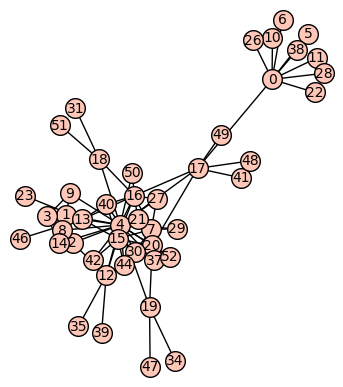

In [241]:
E=[tuple(b) for b in BadPairs]
BadPairs_G=Graph(E)
BadPairs_G.plot().show()

In [242]:
n=8
t=4
m=len(F345)
UniqFortRepIndex=Subsets(range(m),t)
PreTVs4=Subsets(range(n),t)
lenU=len(UniqFortRepIndex)
lenPre=len(PreTVs4)

print lenU
print lenPre

292825
70


In [243]:
GoodIndices=[]
GoodIndicesT=[]

for i in range(lenU):
    U=[F345[k] for k in UniqFortRepIndex[i]]
    #print U
    uniq=[]
    #if U[0] in U[1].union(U[2]).union(U[3])
    for x0 in U[0]:
        if not(x0 in U[1].union(U[2]).union(U[3])):
            uniq.append(x0)
            for x1 in U[1]:
                if not(x1 in U[0].union(U[2]).union(U[3])):
                    uniq.append(x1)
                    for x2 in U[2]:
                        if not(x2 in U[0].union(U[1]).union(U[3])):
                            uniq.append(x2)
                            for x3 in U[3]:
                                if not(x3 in U[0].union(U[1]).union(U[2])):
                                    uniq.append(x3)
                                    if len(list(set(uniq)))==4:
                                        GoodIndices.append(i)
                                        GoodIndicesT.append(list(set(uniq)))
                                        print i, U
                                        print uniq
                    
        

153 [{0, 2, 3}, {0, 1, 7}, {1, 3, 4, 6}, {0, 1, 3, 5}]
[2, 7, 4, 5]
176 [{0, 2, 3}, {0, 1, 7}, {0, 1, 3, 4, 6}, {0, 1, 3, 5}]
[2, 7, 4, 5]
206 [{0, 2, 3}, {0, 1, 7}, {3, 4, 6, 7}, {0, 3, 5, 7}]
[2, 1, 4, 5]
221 [{0, 2, 3}, {0, 1, 7}, {0, 3, 4, 6, 7}, {0, 3, 5, 7}]
[2, 1, 4, 5]
374 [{0, 2, 3}, {0, 1, 7}, {0, 1, 2, 4}, {1, 2, 5, 6}]
[3, 7, 4, 5]
384 [{0, 2, 3}, {0, 1, 7}, {0, 1, 2, 4}, {0, 1, 2, 5, 6}]
[3, 7, 4, 5]
420 [{0, 2, 3}, {0, 1, 7}, {2, 5, 6, 7}, {0, 2, 4, 7}]
[3, 1, 5, 4]
433 [{0, 2, 3}, {0, 1, 7}, {0, 2, 4, 7}, {0, 2, 5, 6, 7}]
[3, 1, 4, 5]
1378 [{0, 2, 3}, {1, 3, 7}, {1, 3, 4, 6}, {0, 1, 3, 5}]
[2, 7, 4, 5]
1401 [{0, 2, 3}, {1, 3, 7}, {0, 1, 3, 4, 6}, {0, 1, 3, 5}]
[2, 7, 4, 5]
1431 [{0, 2, 3}, {1, 3, 7}, {3, 4, 6, 7}, {0, 3, 5, 7}]
[2, 1, 4, 5]
1446 [{0, 2, 3}, {1, 3, 7}, {0, 3, 4, 6, 7}, {0, 3, 5, 7}]
[2, 1, 4, 5]
1680 [{0, 2, 3}, {1, 3, 7}, {1, 3, 4, 6}, {1, 2, 5, 6}]
[0, 7, 4, 5]
1684 [{0, 2, 3}, {2, 3, 4, 5}, {1, 3, 7}, {1, 3, 4, 6}]
[0, 5, 7, 6]
1708 [{0, 2, 3}, {1, 2, 

12051 [{0, 2, 3}, {0, 3, 4, 6, 7}, {1, 3, 4, 6}, {0, 3, 4, 5, 6}]
[2, 7, 1, 5]
12205 [{0, 2, 3}, {2, 3, 4, 5, 6}, {1, 3, 4, 6}, {2, 3, 4, 6, 7}]
[0, 5, 1, 7]
12222 [{0, 2, 3}, {2, 3, 4, 5}, {1, 2, 5, 6}, {1, 2, 3, 7}]
[0, 4, 6, 7]
12244 [{0, 2, 3}, {1, 2, 5, 6}, {1, 2, 3, 7}, {1, 2, 3, 4, 6}]
[0, 5, 7, 4]
12246 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 2, 5, 6}, {1, 2, 3, 7}]
[0, 4, 6, 7]
12296 [{0, 2, 3}, {2, 4, 5, 6}, {2, 5, 6, 7}, {1, 2, 5, 6}]
[0, 4, 7, 1]
12309 [{0, 2, 3}, {2, 4, 5, 6}, {1, 2, 5, 6}, {0, 2, 5, 6, 7}]
[3, 4, 1, 7]
12329 [{0, 2, 3}, {2, 4, 5, 6}, {2, 3, 5, 6, 7}, {1, 2, 5, 6}]
[0, 4, 7, 1]
12331 [{0, 2, 3}, {2, 3, 4, 5}, {2, 5, 6, 7}, {1, 2, 5, 6}]
[0, 4, 7, 1]
12364 [{0, 2, 3}, {2, 3, 4, 5}, {2, 3, 5, 6, 7}, {1, 2, 5, 6}]
[0, 4, 7, 1]
12367 [{0, 2, 3}, {2, 5, 6, 7}, {3, 4, 5, 6}, {1, 2, 5, 6}]
[0, 7, 4, 1]
12374 [{0, 2, 3}, {2, 5, 6, 7}, {0, 2, 4, 5, 6}, {1, 2, 5, 6}]
[3, 7, 4, 1]
12395 [{0, 2, 3}, {2, 3, 4, 5, 6}, {2, 5, 6, 7}, {1, 2, 5, 6}]
[0, 4, 7, 1]
12463 [{0, 2, 3}, 

26255 [{0, 1, 7}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}, {0, 1, 2, 3, 4}]
[7, 5, 6, 4]
26257 [{0, 1, 7}, {0, 1, 3, 4, 6}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}]
[7, 4, 5, 2]
26281 [{0, 1, 7}, {0, 1, 3, 5}, {0, 1, 4, 5, 6}, {0, 1, 2, 5, 6}]
[7, 3, 4, 2]
26521 [{0, 1, 7}, {0, 1, 3, 4, 6}, {0, 1, 3, 5}, {0, 1, 2, 3, 4}]
[7, 6, 5, 2]
26713 [{0, 1, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}, {0, 4, 5, 6}]
[1, 2, 3, 6]
26720 [{0, 1, 7}, {2, 5, 6, 7}, {0, 3, 5, 7}, {0, 4, 5, 6}]
[1, 2, 3, 4]
26733 [{0, 1, 7}, {0, 2, 5, 6, 7}, {0, 3, 5, 7}, {0, 4, 5, 6}]
[1, 2, 3, 4]
26890 [{0, 1, 7}, {2, 5, 6, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}]
[1, 6, 4, 3]
26891 [{3, 4, 6, 7}, {0, 1, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}]
[6, 1, 2, 5]
26893 [{0, 1, 7}, {0, 2, 4, 7}, {4, 5, 6, 7}, {0, 3, 5, 7}]
[1, 2, 6, 3]
26901 [{0, 1, 7}, {0, 2, 4, 7}, {0, 4, 5, 6, 7}, {0, 3, 5, 7}]
[1, 2, 6, 3]
26903 [{0, 1, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}, {0, 2, 5, 6, 7}]
[1, 4, 3, 6]
26906 [{0, 1, 7}, {0, 3, 4, 6, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}]
[1, 6, 2, 5]
27152 [{0, 1, 7

51851 [{2, 3, 4, 5, 7}, {1, 3, 7}, {0, 2, 4, 7}, {2, 3, 4, 6, 7}]
[5, 1, 0, 6]
51873 [{1, 3, 7}, {1, 3, 4, 6}, {1, 2, 5, 6}, {0, 1, 2, 3, 6}]
[7, 4, 5, 0]
52030 [{2, 3, 4, 5}, {1, 3, 7}, {1, 3, 4, 6}, {0, 1, 2, 3, 4}]
[5, 7, 6, 0]
52203 [{1, 3, 7}, {1, 3, 4, 6}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 6}]
[7, 4, 5, 0]
52462 [{0, 1, 2, 3, 4}, {1, 3, 7}, {1, 3, 4, 6}, {1, 2, 3, 4, 5}]
[0, 7, 6, 5]
52764 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 3, 5}, {1, 2, 5, 6}]
[4, 7, 0, 6]
52937 [{1, 3, 7}, {1, 2, 5, 6}, {0, 1, 2, 3, 6}, {1, 2, 3, 4, 6}]
[7, 5, 0, 4]
53049 [{1, 2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 3, 5}, {1, 2, 5, 6}]
[4, 7, 0, 6]
54605 [{1, 2, 3, 4, 6}, {1, 3, 7}, {0, 1, 3, 4, 6}, {1, 4, 5, 6}]
[2, 7, 0, 5]
55394 [{2, 3, 4, 5}, {1, 3, 7}, {0, 2, 3, 5, 7}, {2, 5, 6, 7}]
[4, 1, 0, 6]
55431 [{0, 2, 3, 4, 7}, {2, 3, 4, 5}, {1, 3, 7}, {3, 4, 6, 7}]
[0, 5, 1, 6]
55648 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 3, 5}, {1, 2, 3, 5, 6}]
[4, 7, 0, 6]
55702 [{2, 3, 4, 5}, {1, 3, 7}, {2, 3, 5, 6, 7}, {0, 2, 3, 5, 7}]
[

73818 [{2, 3, 4, 5}, {2, 5, 6, 7}, {1, 2, 7}, {0, 2, 3, 5, 7}]
[4, 6, 1, 0]
73855 [{3, 4, 6, 7}, {2, 3, 4, 5}, {1, 2, 7}, {0, 2, 3, 4, 7}]
[6, 5, 1, 0]
74072 [{2, 3, 4, 5}, {0, 1, 2, 3, 5}, {1, 2, 7}, {1, 2, 3, 5, 6}]
[4, 0, 7, 6]
74126 [{2, 3, 4, 5}, {1, 2, 7}, {0, 2, 3, 5, 7}, {2, 3, 5, 6, 7}]
[4, 1, 0, 6]
74208 [{0, 2, 3, 4, 7}, {2, 3, 4, 5}, {1, 2, 7}, {2, 3, 4, 6, 7}]
[0, 5, 1, 6]
74219 [{2, 3, 4, 5}, {1, 2, 7}, {1, 2, 3, 4, 6}, {0, 1, 2, 3, 4}]
[5, 7, 6, 0]
74685 [{2, 3, 4, 5, 7}, {2, 5, 6, 7}, {1, 2, 7}, {0, 2, 3, 5, 7}]
[4, 6, 1, 0]
75299 [{3, 4, 6, 7}, {0, 2, 3, 4, 7}, {1, 2, 7}, {2, 3, 4, 5, 7}]
[6, 0, 1, 5]
76242 [{2, 3, 5, 6, 7}, {1, 2, 7}, {4, 5, 6, 7}, {0, 2, 5, 6, 7}]
[3, 1, 4, 0]
76544 [{0, 1, 2, 3, 4}, {0, 1, 2, 3, 5}, {1, 2, 7}, {0, 1, 2, 3, 6}]
[4, 5, 7, 6]
76804 [{1, 2, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 3, 6}, {1, 2, 3, 4, 6}]
[7, 5, 0, 4]
77222 [{1, 2, 4, 5, 6}, {1, 2, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 5, 6}]
[4, 7, 3, 0]
78287 [{1, 2, 3, 4, 5}, {0, 1, 2, 3, 5}, {1, 2, 7

136051 [{2, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {1, 4, 5, 6}, {0, 4, 5, 6}]
[3, 7, 1, 0]
136053 [{2, 3, 4, 5, 6}, {1, 4, 5, 6}, {3, 4, 5, 6, 7}, {0, 4, 5, 6}]
[2, 1, 7, 0]
136058 [{2, 4, 5, 6, 7}, {1, 4, 5, 6}, {3, 4, 5, 6, 7}, {0, 4, 5, 6}]
[2, 1, 3, 0]
136151 [{2, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 4, 6, 7}, {0, 4, 5, 6}]
[2, 1, 3, 0]
136153 [{2, 4, 5, 6}, {3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 4, 5, 6}]
[2, 7, 1, 0]
136162 [{2, 4, 5, 6}, {3, 4, 5, 6}, {4, 5, 6, 7}, {0, 4, 5, 6}]
[2, 3, 7, 0]
136183 [{2, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 4, 5, 6}, {0, 4, 5, 6}]
[2, 1, 3, 0]
136216 [{2, 4, 5, 6}, {1, 3, 4, 5, 6}, {4, 5, 6, 7}, {0, 4, 5, 6}]
[2, 1, 7, 0]
136636 [{2, 4, 5, 6}, {1, 4, 5, 6, 7}, {1, 3, 4, 5, 6}, {0, 4, 5, 6}]
[2, 7, 3, 0]
136644 [{2, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 4, 5, 6, 7}, {0, 4, 5, 6}]
[2, 1, 3, 0]
136661 [{2, 4, 5, 6}, {3, 4, 5, 6, 7}, {1, 3, 4, 5, 6}, {0, 4, 5, 6}]
[2, 7, 1, 0]
136711 [{1, 2, 4, 5, 6}, {2, 3, 4, 5}, {2, 5, 6, 7}, {0, 4, 5, 6}]
[1, 3, 7, 0]
136748 [{2, 3, 4, 5}, {3,

211879 [{2, 3, 4, 5}, {2, 5, 6, 7}, {0, 2, 3, 5, 7}, {1, 2, 3, 7}]
[4, 6, 0, 1]
211916 [{0, 2, 3, 4, 7}, {2, 3, 4, 5}, {3, 4, 6, 7}, {1, 2, 3, 7}]
[0, 5, 6, 1]
212133 [{2, 3, 4, 5}, {0, 1, 2, 3, 5}, {1, 2, 3, 5, 6}, {1, 2, 3, 7}]
[4, 0, 6, 7]
212187 [{2, 3, 4, 5}, {2, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {1, 2, 3, 7}]
[4, 6, 0, 1]
212269 [{0, 2, 3, 4, 7}, {2, 3, 4, 5}, {1, 2, 3, 7}, {2, 3, 4, 6, 7}]
[0, 5, 1, 6]
212280 [{2, 3, 4, 5}, {1, 2, 3, 4, 6}, {1, 2, 3, 7}, {0, 1, 2, 3, 4}]
[5, 6, 7, 0]
212746 [{2, 3, 4, 5, 7}, {2, 5, 6, 7}, {0, 2, 3, 5, 7}, {1, 2, 3, 7}]
[4, 6, 0, 1]
213360 [{0, 2, 3, 4, 7}, {2, 3, 4, 5, 7}, {3, 4, 6, 7}, {1, 2, 3, 7}]
[0, 5, 6, 1]
214605 [{0, 1, 2, 3, 4}, {0, 1, 2, 3, 5}, {0, 1, 2, 3, 6}, {1, 2, 3, 7}]
[4, 5, 6, 7]
214865 [{1, 2, 3, 5, 6}, {0, 1, 2, 3, 6}, {1, 2, 3, 7}, {1, 2, 3, 4, 6}]
[5, 0, 7, 4]
216348 [{1, 2, 3, 4, 5}, {0, 1, 2, 3, 5}, {1, 2, 3, 5, 6}, {1, 2, 3, 7}]
[4, 0, 6, 7]
216981 [{2, 3, 4, 5, 7}, {2, 3, 5, 6, 7}, {0, 2, 3, 5, 7}, {1, 2, 3, 7}]
[4, 6, 0, 1

260872 [{2, 3, 4, 5, 6}, {1, 3, 4, 5, 6}, {4, 5, 6, 7}, {0, 3, 4, 5, 6}]
[2, 1, 7, 0]
261799 [{0, 1, 2, 3, 7}, {0, 1, 2, 3, 4}, {0, 1, 2, 3, 5}, {0, 1, 2, 3, 6}]
[7, 4, 5, 6]
268826 [{1, 2, 4, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 5, 6}]
[4, 7, 3, 0]
278157 [{0, 2, 4, 5, 6}, {0, 4, 5, 6, 7}, {0, 1, 4, 5, 6}, {0, 3, 4, 5, 6}]
[2, 7, 1, 3]
279946 [{1, 2, 4, 5, 6}, {2, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {0, 2, 4, 5, 6}]
[1, 3, 7, 0]
283848 [{1, 4, 5, 6, 7}, {2, 4, 5, 6, 7}, {3, 4, 5, 6, 7}, {0, 4, 5, 6, 7}]
[1, 2, 3, 0]
285236 [{1, 2, 4, 5, 6}, {1, 4, 5, 6, 7}, {1, 3, 4, 5, 6}, {0, 1, 4, 5, 6}]
[2, 7, 3, 0]
286802 [{2, 4, 5, 6, 7}, {2, 3, 5, 6, 7}, {1, 2, 5, 6, 7}, {0, 2, 5, 6, 7}]
[4, 3, 1, 0]
289670 [{0, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {3, 4, 5, 6, 7}, {2, 3, 4, 6, 7}]
[0, 1, 5, 2]
290114 [{1, 3, 4, 6, 7}, {0, 1, 3, 4, 6}, {1, 3, 4, 5, 6}, {1, 2, 3, 4, 6}]
[7, 0, 5, 2]
291397 [{2, 3, 4, 5, 6}, {3, 4, 5, 6, 7}, {1, 3, 4, 5, 6}, {0, 3, 4, 5, 6}]
[2, 7, 1, 0]
291649 [{2, 3, 4, 5, 6},

In [244]:
U=[F345[k] for k in UniqFortRepIndex[153]]
U

[{0, 2, 3}, {0, 1, 7}, {1, 3, 4, 6}, {0, 1, 3, 5}]

In [245]:
print len(GoodIndices)
# for g in GoodIndices:
#     print UniqFortRepIndex[g]

769


In [246]:
for b in BadPairs:
    for g in GoodIndices:
        UniqFortRepIndex
        if Set(b).issubset(UniqFortRepIndex[g]):
            GoodIndices.remove(g)

len(GoodIndices)

586

In [223]:
j=GoodIndices[1]
print j
print UniqFortRepIndex[j]
U=[F345[k] for k in UniqFortRepIndex[j]]
U

221
{0, 1, 34, 6}


[{0, 2, 3}, {0, 1, 7}, {0, 3, 4, 6, 7}, {0, 3, 5, 7}]

In [247]:
lenG=len(GoodIndices)
m=len(F345)

PreComp=[]

for i in range(lenG):
    j=GoodIndices[i]
    U=[F345[k] for k in UniqFortRepIndex[j]]
    
    #print i, U
    
    lenU=len(U)
    NewUnions=[]

    for j1 in range(lenU):
        for j2 in range(j1+1,lenU):
            union=U[j1].union(U[j2])
            inter=U[j1].intersection(U[j2])
            
            if len(inter)>0:
                for x in inter:
                    NewUnions.append(union.difference({x}))
    
    NewUnionsSet=list(set(NewUnions)) 
    
    n=len(U)
    lenN=len(NewUnionsSet)
    
    #print 
    #print lenN
    #print NewUnionsSet
    #print

    for j in range(lenN):
        Comp='Compatible'
        if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
            #print j,NewUnionsSet[j]
            Y=NewUnionsSet[j]
            if (not ( any(f.issubset(Y) for f in F345) ) ):
                Comp='Incompatible'
                break;
                #print 'incompatible'
                
    if Comp=='Compatible':
        PreComp.append(i)
        print i, U
        print Comp, '\n'



7 [{0, 2, 3}, {1, 3, 7}, {1, 2, 5, 6}, {1, 2, 3, 4, 6}]
Compatible 

8 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 5, 6}]
Compatible 

13 [{0, 2, 3}, {1, 3, 7}, {2, 5, 6, 7}, {2, 3, 4, 6, 7}]
Compatible 

14 [{0, 2, 3}, {2, 3, 4, 5, 7}, {1, 3, 7}, {2, 5, 6, 7}]
Compatible 

17 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 3, 4, 6}]
Compatible 

18 [{0, 2, 3}, {1, 3, 7}, {1, 2, 3, 5, 6}, {1, 2, 3, 4, 6}]
Compatible 

19 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 3, 5, 6}]
Compatible 

20 [{0, 2, 3}, {2, 3, 4, 5, 7}, {1, 3, 7}, {2, 3, 4, 6, 7}]
Compatible 

21 [{0, 2, 3}, {1, 3, 7}, {2, 3, 5, 6, 7}, {2, 3, 4, 6, 7}]
Compatible 

22 [{0, 2, 3}, {2, 3, 4, 5, 7}, {1, 3, 7}, {2, 3, 5, 6, 7}]
Compatible 

25 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 2, 7}, {1, 3, 4, 6}]
Compatible 

26 [{0, 2, 3}, {1, 2, 7}, {1, 3, 4, 6}, {1, 2, 3, 5, 6}]
Compatible 

34 [{0, 2, 3}, {3, 4, 6, 7}, {1, 2, 7}, {2, 3, 4, 5, 7}]
Compatible 

35 [{0, 2, 3}, {3, 4, 6, 7}, {1, 2, 7}, {2, 3, 5, 6, 7}]
Compatible 

36 [

234 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 4}, {1, 2, 3, 4, 6}]
Compatible 

235 [{1, 3, 7}, {0, 1, 2, 3, 5}, {0, 1, 2, 4}, {0, 1, 2, 3, 6}]
Compatible 

236 [{1, 2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 4}, {1, 2, 3, 4, 6}]
Compatible 

238 [{2, 3, 4, 5}, {1, 3, 7}, {0, 2, 4, 7}, {2, 3, 4, 6, 7}]
Compatible 

240 [{2, 3, 4, 5, 7}, {1, 3, 7}, {0, 2, 4, 7}, {2, 3, 4, 6, 7}]
Compatible 

243 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 3, 5}, {1, 2, 5, 6}]
Compatible 

244 [{1, 3, 7}, {1, 2, 5, 6}, {0, 1, 2, 3, 6}, {1, 2, 3, 4, 6}]
Compatible 

245 [{1, 2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 3, 5}, {1, 2, 5, 6}]
Compatible 

246 [{1, 2, 3, 4, 6}, {1, 3, 7}, {0, 1, 3, 4, 6}, {1, 4, 5, 6}]
Compatible 

247 [{2, 3, 4, 5}, {1, 3, 7}, {0, 2, 3, 5, 7}, {2, 5, 6, 7}]
Compatible 

249 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 2, 3, 5}, {1, 2, 3, 5, 6}]
Compatible 

250 [{2, 3, 4, 5}, {1, 3, 7}, {2, 3, 5, 6, 7}, {0, 2, 3, 5, 7}]
Compatible 

251 [{0, 2, 3, 4, 7}, {2, 3, 4, 5}, {1, 3, 7}, {2, 3, 4, 6, 7}]
Compatible 

252 [{2, 3,

374 [{2, 3, 4, 5}, {0, 1, 3, 5}, {1, 2, 3, 7}, {1, 2, 5, 6}]
Compatible 

375 [{1, 2, 3, 4, 5}, {0, 1, 3, 5}, {1, 2, 3, 7}, {1, 2, 5, 6}]
Compatible 

376 [{2, 3, 4, 5}, {1, 2, 3, 5, 6}, {0, 1, 3, 5}, {1, 2, 3, 7}]
Compatible 

377 [{0, 1, 2, 3, 4}, {0, 1, 2, 3, 6}, {0, 1, 3, 5}, {1, 2, 3, 7}]
Compatible 

378 [{1, 2, 3, 4, 5}, {1, 2, 3, 5, 6}, {0, 1, 3, 5}, {1, 2, 3, 7}]
Compatible 

379 [{0, 1, 2, 3, 7}, {0, 1, 2, 3, 4}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}]
Compatible 

380 [{0, 1, 3, 7}, {3, 4, 6, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}]
Compatible 

381 [{0, 1, 3, 7}, {0, 3, 4, 6, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}]
Compatible 

382 [{0, 1, 3, 7}, {0, 2, 3, 4, 7}, {3, 4, 6, 7}, {0, 3, 5, 7}]
Compatible 

383 [{0, 1, 3, 7}, {0, 2, 3, 4, 7}, {0, 3, 4, 6, 7}, {0, 3, 5, 7}]
Compatible 

384 [{0, 1, 2, 7}, {2, 5, 6, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}]
Compatible 

385 [{0, 1, 2, 7}, {0, 2, 4, 7}, {0, 3, 5, 7}, {0, 2, 5, 6, 7}]
Compatible 

386 [{2, 3, 4, 5}, {2, 5, 6, 7}, {1, 2, 3, 7}, {0, 3, 5, 7}]
Compatibl

522 [{0, 1, 3, 4, 6}, {3, 4, 6, 7}, {1, 2, 3, 4, 6}, {1, 4, 5, 6}]
Compatible 

523 [{2, 3, 4, 5, 6}, {3, 4, 6, 7}, {0, 3, 4, 5, 6}, {1, 4, 5, 6}]
Compatible 

527 [{0, 1, 2, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 3, 5, 6}, {1, 4, 5, 6}]
Compatible 

528 [{0, 3, 4, 5, 6}, {0, 2, 4, 5, 6}, {0, 4, 5, 6, 7}, {1, 4, 5, 6}]
Compatible 

529 [{2, 3, 4, 5, 6}, {2, 4, 5, 6, 7}, {0, 2, 4, 5, 6}, {1, 4, 5, 6}]
Compatible 

530 [{2, 4, 5, 6, 7}, {3, 4, 5, 6, 7}, {0, 4, 5, 6, 7}, {1, 4, 5, 6}]
Compatible 

531 [{1, 2, 3, 4, 6}, {0, 1, 3, 4, 6}, {1, 3, 4, 6, 7}, {1, 4, 5, 6}]
Compatible 

532 [{2, 3, 4, 5, 6}, {3, 4, 5, 6, 7}, {0, 3, 4, 5, 6}, {1, 4, 5, 6}]
Compatible 

533 [{2, 4, 5, 6}, {1, 4, 5, 6, 7}, {3, 4, 6, 7}, {0, 4, 5, 6, 7}]
Compatible 

534 [{2, 4, 5, 6}, {3, 4, 6, 7}, {1, 3, 4, 5, 6}, {0, 3, 4, 5, 6}]
Compatible 

539 [{2, 4, 5, 6}, {1, 2, 5, 6, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 5, 6}]
Compatible 

540 [{2, 4, 5, 6}, {0, 4, 5, 6, 7}, {0, 1, 4, 5, 6}, {0, 3, 4, 5, 6}]
Compatible 

541 [{2, 4, 5, 6

In [333]:
j=GoodIndices[364]
U=[F345[k] for k in UniqFortRepIndex[j]]
U

[{0, 1, 3, 7}, {0, 1, 2, 3, 4}, {1, 3, 4, 6}, {0, 1, 3, 5}]

In [334]:
ExchangeUnions(U)

[{0, 2, 3, 4, 7},
 {0, 1, 2, 3, 6},
 {0, 1, 4, 6, 7},
 {1, 3, 5, 7},
 {0, 2, 3, 4, 6},
 {0, 3, 4, 5, 6},
 {0, 1, 4, 5, 6},
 {0, 3, 5, 7},
 {0, 1, 5, 7},
 {0, 1, 2, 4, 6},
 {0, 3, 4, 6, 7},
 {1, 2, 3, 4, 7},
 {0, 1, 2, 4, 7},
 {0, 1, 2, 4, 5},
 {0, 2, 3, 4, 5},
 {1, 2, 3, 4, 5}]

In [328]:
lenU=len(U)
NewUnions=[]

for j1 in range(lenU):
    for j2 in range(j1+1,lenU):
        union=U[j1].union(U[j2])
        inter=U[j1].intersection(U[j2])

        if len(inter)>0:
            for x in inter:
                NewUnions.append(union.difference({x}))

NewUnionsSet=list(set(NewUnions)) 

In [329]:
#if there is only one possible element that fulfills the exchange property, this adds this element to the list

#print NewUnions
NewUnionsSet=list(set(NewUnions))
#print 
#print NewUnionsSet

n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for j in range(m):
    if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
        #print j,NewUnionsSet[j],'\n','------------------'
        Y=NewUnionsSet[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        
        PossSubs=[]
        for f in F345:
            if f.issubset(Y):
                PossSubs.append(f)
            #print PossSubs
        if len(PossSubs)==1:
            U.append(PossSubs[0])

        

U

16
[{0, 2, 3, 4, 7}, {0, 1, 2, 3, 6}, {0, 1, 4, 6, 7}, {1, 3, 5, 7}, {0, 2, 3, 4, 6}, {0, 3, 4, 5, 6}, {0, 1, 4, 5, 6}, {0, 3, 5, 7}, {0, 1, 5, 7}, {0, 1, 2, 4, 6}, {0, 3, 4, 6, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {0, 1, 2, 4, 5}, {0, 2, 3, 4, 5}, {1, 2, 3, 4, 5}]



[{0, 1, 3, 7},
 {0, 1, 2, 3, 4},
 {1, 3, 4, 6},
 {0, 1, 3, 5},
 {0, 1, 7},
 {1, 3, 7},
 {0, 2, 3},
 {0, 3, 5, 7},
 {0, 1, 2, 4}]

In [330]:
lenU=len(U)
NewUnions=[]

for j1 in range(lenU):
    for j2 in range(j1+1,lenU):
        union=U[j1].union(U[j2])
        inter=U[j1].intersection(U[j2])

        if len(inter)>0:
            for x in inter:
                NewUnions.append(union.difference({x}))

NewUnionsSet=list(set(NewUnions)) 
    

In [331]:
#print NewUnions
NewUnionsSet=list(set(NewUnions))
#print 
#print NewUnionsSet

#tells you what elements are available to fulfill the exchange property of circuits

n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for j in range(m):
    if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
        print j,NewUnionsSet[j],'\n','------------------'
        Y=NewUnionsSet[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        for f in F345:
            if f.issubset(Y):
                print f

        print

40
[{0, 1, 2, 3, 6}, {0, 1, 3, 5}, {1, 2, 3, 4}, {1, 2, 3, 5}, {0, 1, 2, 5}, {0, 1, 5, 7}, {1, 4, 6, 7}, {0, 1, 2, 4, 6}, {0, 3, 7}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 4, 7}, {0, 1, 3}, {1, 3, 5, 7}, {0, 2, 3, 4, 6}, {0, 3, 5, 7}, {1, 2, 3, 7}, {0, 1, 2, 4, 5}, {1, 2, 3, 4, 5, 7}, {0, 1, 7}, {0, 1, 3, 7}, {0, 1, 4, 5, 6, 7}, {0, 1, 4, 5, 6}, {0, 2, 3, 4}, {0, 1, 2, 7}, {0, 1, 2, 3}, {0, 2, 3, 4, 7}, {0, 1, 4, 6, 7}, {2, 3, 5, 7}, {0, 2, 5, 7}, {3, 4, 6, 7}, {0, 3, 4, 5, 6}, {0, 1, 2, 4}, {0, 1, 3, 4}, {0, 1, 2, 4, 5, 7}, {0, 3, 4, 6, 7}, {1, 2, 3, 4, 7}, {0, 1, 2, 4, 7}, {0, 2, 4, 7}, {0, 2, 3, 4, 5}]

2 {1, 2, 3, 4} 
------------------
incompatible

3 {1, 2, 3, 5} 
------------------
incompatible

4 {0, 1, 2, 5} 
------------------
incompatible

6 {1, 4, 6, 7} 
------------------
incompatible

8 {0, 3, 7} 
------------------
incompatible

9 {1, 2, 3, 4, 5} 
------------------
{2, 3, 4, 5}
{1, 2, 3, 4, 5}

11 {1, 2, 4, 7} 
------------------
{1, 2, 7}

12 {0, 1, 3} 
------------------


In [295]:
lenU=len(U)
NewUnions=[]

for j1 in range(lenU):
    for j2 in range(j1+1,lenU):
        union=U[j1].union(U[j2])
        inter=U[j1].intersection(U[j2])

        if len(inter)>0:
            for x in inter:
                NewUnions.append(union.difference({x}))

NewUnionsSet=list(set(NewUnions)) 
    

In [ ]:
#print NewUnions
NewUnionsSet=list(set(NewUnions))
#print 
#print NewUnionsSet

#tells you what elements are available to fulfill the exchange property of circuits

n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for j in range(m):
    if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
        print j,NewUnionsSet[j],'\n','------------------'
        Y=NewUnionsSet[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        for f in F345:
            if f.issubset(Y):
                print f

        print

In [249]:
print len(PreComp), PreComp

452 [7, 8, 13, 14, 17, 18, 19, 20, 21, 22, 25, 26, 34, 35, 36, 37, 38, 39, 40, 41, 46, 47, 48, 49, 50, 54, 56, 57, 58, 59, 60, 63, 64, 65, 67, 72, 73, 74, 75, 81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 218, 220, 221, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 238, 240, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 275, 276, 277, 279, 281, 283, 284, 285, 286, 287, 290, 291, 2

In [229]:
NewUnionsSet

[{0, 1, 2, 3, 6},
 {0, 1, 2, 5, 7},
 {0, 1, 2, 3, 5},
 {0, 1, 2, 4, 6},
 {1, 2, 3, 4, 6},
 {1, 2, 4, 6, 7},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 5, 7},
 {0, 2, 4, 5, 6},
 {1, 2, 3, 6, 7},
 {0, 1, 2, 6, 7},
 {0, 1, 5, 6, 7},
 {1, 3, 5, 6, 7},
 {0, 1, 2, 4, 5},
 {2, 3, 5, 6, 7},
 {2, 3, 4, 5, 6},
 {1, 4, 5, 6, 7},
 {1, 3, 4, 5, 6},
 {0, 1, 4, 5, 6},
 {0, 2, 3, 5, 6},
 {0, 2, 5, 6, 7},
 {0, 1, 3, 5, 6},
 {2, 4, 5, 6, 7},
 {1, 2, 4, 5, 7}]

In [234]:
New_PreComp=[]

for l in range(len(PreComp)):
    j=GoodIndices[PreComp[l]]
    U=[F345[k] for k in UniqFortRepIndex[j]]
    
    n=len(U)
    m=len(NewUnionsSet)

    

    for j in range(m):
        if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
            #print j,NewUnionsSet[j],'\n','------------------'
            Y=NewUnionsSet[j]
            if (not ( any(f.issubset(Y) for f in F345) ) ):
                print 'incompatible'

            PossSubs=[]
            for f in F345:
                if f.issubset(Y):
                    PossSubs.append(f)
                #print PossSubs
            if len(PossSubs)==1:
                U.append(PossSubs[0])

    
    n=len(U)
    lenN=len(NewUnionsSet)
    
    #print 
    #print lenN
    #print NewUnionsSet
    #print

    for j in range(lenN):
        Comp='Compatible'
        if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
            #print j,NewUnionsSet[j]
            Y=NewUnionsSet[j]
            if (not ( any(f.issubset(Y) for f in F345) ) ):
                Comp='Incompatible'
                break;
                #print 'incompatible'
                
    if Comp=='Compatible':
        New_PreComp.append(i)
        print l, PreComp[l], GoodIndices[PreComp[l]], U
        print Comp, '\n'


0 7 1745 [{0, 2, 3}, {1, 3, 7}, {1, 2, 5, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

1 8 1747 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

2 13 1933 [{0, 2, 3}, {1, 3, 7}, {2, 5, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

3 14 1935 [{0, 2, 3}, {2, 3, 4, 5, 7}, {1, 3, 7}, {2, 5, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

4 17 2410 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 3, 4, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

5 18 2415 [{0, 2, 3}, {1, 3, 7}, {1, 2, 3, 5, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

6 19 2438 [{0, 2, 3}, {1, 2, 3, 4, 5}, {1, 3, 7}, {1, 2, 3, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 1, 3, 5}]
Compatible 

7 20 2486 [{0, 2, 3}, {2, 3, 4, 5, 7}, {1, 3, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {

62 111 16561 [{0, 2, 3}, {2, 3, 4, 5, 6}, {3, 4, 6, 7}, {1, 2, 3, 4, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 1, 3, 5}]
Compatible 

63 112 16969 [{0, 2, 3}, {0, 3, 4, 6, 7}, {0, 1, 3, 4, 6}, {3, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 1, 3, 5}]
Compatible 

64 113 17056 [{0, 2, 3}, {2, 3, 4, 6, 7}, {3, 4, 5, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 1, 3, 5}]
Compatible 

65 114 17081 [{0, 2, 3}, {1, 2, 3, 4, 5}, {3, 4, 5, 6}, {2, 3, 4, 5, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 1, 3, 5}]
Compatible 

66 115 17123 [{0, 2, 3}, {2, 3, 5, 6, 7}, {3, 4, 5, 6}, {1, 2, 3, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 1, 3, 5}]
Compatible 

67 116 18124 [{0, 2, 3}, {0, 2, 5, 6, 7}, {0, 2, 4, 5, 6}, {0, 1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 1, 3, 5}]
Compatible 

68 117 21132 [{0, 2, 3}, {0, 3, 4, 6, 7}, {0, 1, 3, 4, 6}, {0, 3, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1,

132 194 45536 [{1, 3, 7}, {3, 4, 5, 6}, {0, 1, 3, 5}, {1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

133 195 45557 [{1, 2, 3, 4, 5}, {1, 3, 7}, {0, 1, 3, 5}, {1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

134 196 45560 [{1, 3, 7}, {1, 3, 4, 5, 6}, {0, 1, 3, 5}, {1, 2, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

135 197 45608 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 3, 5}, {1, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

136 198 45632 [{1, 2, 3, 4, 5}, {1, 3, 7}, {0, 1, 3, 5}, {1, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

137 199 45637 [{1, 3, 7}, {0, 1, 3, 5}, {1, 2, 3, 5, 6}, {1, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

138 200 45706 [{2, 3, 4, 5}, {1, 3, 7}, {1, 3, 4, 5, 6}, {0, 1, 3, 5}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {0, 2, 3}]
Compatible 

139 201 45708 [{2, 3, 4, 5}, {1, 3, 7}, {0, 1, 3, 5}, {1, 2, 3, 5, 6}, {0, 1, 2, 4}, {1, 

191 267 62780 [{1, 2, 3, 4, 5}, {0, 1, 2, 4}, {1, 2, 7}, {4, 5, 6}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

192 268 62827 [{0, 2, 4, 7}, {1, 2, 7}, {4, 5, 6}, {2, 3, 4, 6, 7}, {0, 1, 2, 4}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

193 269 62829 [{0, 2, 4, 7}, {2, 3, 4, 5, 7}, {1, 2, 7}, {4, 5, 6}, {0, 1, 2, 4}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

194 270 63240 [{1, 2, 7}, {4, 5, 6}, {1, 2, 3, 5, 6}, {0, 1, 2, 5, 6}, {0, 1, 2, 4}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

195 271 63441 [{2, 3, 5, 6, 7}, {1, 2, 7}, {4, 5, 6}, {0, 2, 5, 6, 7}, {0, 1, 2, 4}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

196 272 63842 [{0, 1, 2, 4}, {1, 2, 7}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

197 273 63843 [{0, 1, 2, 4}, {1, 2, 7}, {0, 1, 3, 5}, {0, 1, 2, 5, 6}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

198 275 64132 [{2, 3, 4, 5}, {1, 2, 7}, {0, 1, 3, 5}, {1, 2, 3, 

274 365 100761 [{0, 1, 3, 7}, {0, 1, 2, 3, 4}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

275 366 100763 [{0, 1, 3, 7}, {0, 1, 3, 4, 6}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

276 367 101027 [{0, 1, 3, 7}, {0, 1, 2, 3, 4}, {0, 1, 3, 4, 6}, {0, 1, 3, 5}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

277 368 101218 [{0, 1, 2, 7}, {0, 1, 2, 4}, {0, 1, 3, 5}, {1, 2, 5, 6}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

278 369 101227 [{0, 1, 2, 7}, {0, 1, 2, 4}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

279 370 101228 [{0, 1, 2, 7}, {0, 1, 2, 4}, {0, 1, 3, 5}, {0, 1, 2, 5, 6}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

280 371 101664 [{0, 1, 2, 7}, {0, 1, 3, 5}, {0, 1, 2, 3, 6}, {0, 1, 2, 3, 4}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}]
Compatible 

281 372 102

352 468 194409 [{2, 3, 4, 5}, {1, 3, 4, 6}, {4, 5, 6, 7}, {0, 3, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

353 469 194784 [{2, 3, 4, 5}, {1, 3, 4, 6}, {0, 3, 4, 5, 6}, {3, 4, 5, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

354 471 196696 [{1, 2, 4, 5, 6}, {1, 3, 4, 6}, {4, 5, 6, 7}, {0, 1, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

355 472 196781 [{0, 3, 4, 6, 7}, {1, 3, 4, 6}, {4, 5, 6, 7}, {2, 3, 4, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

356 473 196830 [{2, 3, 4, 5, 6}, {1, 3, 4, 6}, {4, 5, 6, 7}, {0, 3, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

357 474 199818 [{1, 2, 4, 5, 6}, {1, 4, 5, 6, 7}, {1, 3, 4, 6}, {0, 1, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

358 475 200608 [{3, 4,

432 566 256007 [{0, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {3, 4, 5, 6}, {2, 3, 4, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

433 567 256097 [{1, 3, 4, 6, 7}, {0, 1, 3, 4, 6}, {3, 4, 5, 6}, {1, 2, 3, 4, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

434 568 256442 [{1, 2, 3, 4, 5}, {3, 4, 5, 6}, {0, 2, 3, 4, 5}, {2, 3, 4, 5, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

435 569 258813 [{0, 2, 4, 5, 6}, {4, 5, 6, 7}, {0, 1, 4, 5, 6}, {0, 3, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

436 570 258989 [{1, 2, 4, 5, 6}, {2, 3, 4, 5, 6}, {0, 2, 4, 5, 6}, {4, 5, 6, 7}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

437 571 259745 [{1, 2, 4, 5, 6}, {1, 3, 4, 5, 6}, {4, 5, 6, 7}, {0, 1, 4, 5, 6}, {0, 1, 2, 4}, {1, 2, 7}, {0, 1, 7}, {1, 3, 7}, {0, 2, 3}, {0, 1, 3, 5}]
Compatible 

438 

In [159]:
#j=GoodIndices[120] where I stopped going from the beginning of the list
j=GoodIndices[368]
U=[F345[k] for k in UniqFortRepIndex[j]]

In [160]:
#creates new unions with one intersection element deleted

m=len(F345)
lenU=len(U)
    
print U

NewUnions=[]

for j1 in range(lenU):
    for j2 in range(j1+1,lenU):
        union=U[j1].union(U[j2])
        inter=U[j1].intersection(U[j2])

        if len(inter)>0:
            for x in inter:
                NewUnions.append(union.difference({x}))
                
NewUnionsSet=list(set(NewUnions))

print len(NewUnionsSet), '\n' ,NewUnionsSet


[{0, 1, 2, 4}, {1, 2, 7}, {4, 5, 6}, {1, 2, 3, 4, 6}]
10 
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 2, 3, 4, 6}, {0, 1, 4, 7}, {1, 2, 3, 5, 6}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {0, 2, 4, 7}, {0, 1, 3, 4, 6}, {1, 2, 3, 4, 5}]


In [161]:
#print NewUnions
NewUnionsSet=list(set(NewUnions))
#print 
#print NewUnionsSet

#tells you what elements are available to fulfill the exchange property of circuits

n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for j in range(m):
    if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
        print j,NewUnionsSet[j],'\n','------------------'
        Y=NewUnionsSet[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        for f in F345:
            if f.issubset(Y):
                print f

        print
            

10
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 2, 3, 4, 6}, {0, 1, 4, 7}, {1, 2, 3, 5, 6}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {0, 2, 4, 7}, {0, 1, 3, 4, 6}, {1, 2, 3, 4, 5}]

0 {0, 1, 2, 3, 6} 
------------------
{0, 2, 3}
{0, 1, 2, 3, 6}

1 {0, 1, 2, 5, 6} 
------------------
{1, 2, 5, 6}
{0, 1, 2, 5, 6}

2 {0, 2, 3, 4, 6} 
------------------
{0, 2, 3}

3 {0, 1, 4, 7} 
------------------
{0, 1, 7}

4 {1, 2, 3, 5, 6} 
------------------
{1, 2, 5, 6}
{1, 2, 3, 5, 6}

5 {2, 3, 4, 6, 7} 
------------------
{3, 4, 6, 7}
{2, 3, 4, 6, 7}

6 {1, 3, 4, 6, 7} 
------------------
{1, 3, 7}
{1, 3, 4, 6}
{3, 4, 6, 7}
{1, 3, 4, 6, 7}

7 {0, 2, 4, 7} 
------------------
{0, 2, 4, 7}

8 {0, 1, 3, 4, 6} 
------------------
{1, 3, 4, 6}
{0, 1, 3, 4, 6}

9 {1, 2, 3, 4, 5} 
------------------
{2, 3, 4, 5}
{1, 2, 3, 4, 5}



In [162]:
#if there is only one possible element that fulfills the exchange property, this adds this element to the list

#print NewUnions
NewUnionsSet=list(set(NewUnions))
#print 
#print NewUnionsSet

n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for j in range(m):
    if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
        #print j,NewUnionsSet[j],'\n','------------------'
        Y=NewUnionsSet[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        
        PossSubs=[]
        for f in F345:
            if f.issubset(Y):
                PossSubs.append(f)
            #print PossSubs
        if len(PossSubs)==1:
            U.append(PossSubs[0])

        

U

10
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {0, 2, 3, 4, 6}, {0, 1, 4, 7}, {1, 2, 3, 5, 6}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {0, 2, 4, 7}, {0, 1, 3, 4, 6}, {1, 2, 3, 4, 5}]



[{0, 1, 2, 4},
 {1, 2, 7},
 {4, 5, 6},
 {1, 2, 3, 4, 6},
 {0, 2, 3},
 {0, 1, 7},
 {0, 2, 4, 7}]

In [163]:
# U.append(Set([0, 4, 5, 6, 7]))

# print U

lenU=len(U)
    
print lenU, '\n' ,U

NewUnions=[]

for j1 in range(lenU):
    for j2 in range(j1+1,lenU):
        union=U[j1].union(U[j2])
        inter=U[j1].intersection(U[j2])

        if len(inter)>0:
            for x in inter:
                NewUnions.append(union.difference({x}))
                
NewUnionsSet=list(set(NewUnions))

print len(NewUnionsSet), '\n' ,NewUnionsSet

7 
[{0, 1, 2, 4}, {1, 2, 7}, {4, 5, 6}, {1, 2, 3, 4, 6}, {0, 2, 3}, {0, 1, 7}, {0, 2, 4, 7}]
26 
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {1, 2, 3, 4}, {2, 3, 4, 7}, {0, 1, 2, 4, 6}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 4, 7}, {0, 2, 3, 4, 6}, {0, 1, 2, 3, 6, 7}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {0, 1, 2}, {0, 1, 3, 7}, {0, 2, 7}, {0, 1, 3, 4, 6, 7}, {1, 2, 3, 7}, {0, 1, 2, 7}, {0, 2, 5, 6, 7}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 4, 7}, {0, 1, 2, 4}, {0, 1, 3, 4}, {0, 2, 4, 7}, {0, 1, 3, 4, 6}]


In [164]:
#print NewUnions
NewUnionsSet=list(set(NewUnions))
#print 
#print NewUnionsSet

print len(U)
print U

n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for j in range(m):
    if (not( any( u.issubset(NewUnionsSet[j]) for u in U) ) ):
        print j,NewUnionsSet[j],'\n','------------------'
        Y=NewUnionsSet[j]
        if (not ( any(f.issubset(Y) for f in F345) ) ):
            print 'incompatible'
        for f in F345:
            if f.issubset(Y):
                print f

        print
            

7
[{0, 1, 2, 4}, {1, 2, 7}, {4, 5, 6}, {1, 2, 3, 4, 6}, {0, 2, 3}, {0, 1, 7}, {0, 2, 4, 7}]
26
[{0, 1, 2, 3, 6}, {0, 1, 2, 5, 6}, {1, 2, 3, 4}, {2, 3, 4, 7}, {0, 1, 2, 4, 6}, {0, 2, 3, 4, 6, 7}, {1, 2, 3, 4, 5}, {1, 2, 4, 7}, {0, 2, 3, 4, 6}, {0, 1, 2, 3, 6, 7}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {0, 1, 2}, {0, 1, 3, 7}, {0, 2, 7}, {0, 1, 3, 4, 6, 7}, {1, 2, 3, 7}, {0, 1, 2, 7}, {0, 2, 5, 6, 7}, {0, 3, 4, 7}, {1, 2, 3, 5, 6}, {0, 1, 4, 7}, {0, 1, 2, 4}, {0, 1, 3, 4}, {0, 2, 4, 7}, {0, 1, 3, 4, 6}]

1 {0, 1, 2, 5, 6} 
------------------
{1, 2, 5, 6}
{0, 1, 2, 5, 6}

2 {1, 2, 3, 4} 
------------------
incompatible

3 {2, 3, 4, 7} 
------------------
incompatible

6 {1, 2, 3, 4, 5} 
------------------
{2, 3, 4, 5}
{1, 2, 3, 4, 5}

10 {2, 3, 4, 6, 7} 
------------------
{3, 4, 6, 7}
{2, 3, 4, 6, 7}

11 {1, 3, 4, 6, 7} 
------------------
{1, 3, 7}
{1, 3, 4, 6}
{3, 4, 6, 7}
{1, 3, 4, 6, 7}

12 {0, 1, 2} 
------------------
incompatible

14 {0, 2, 7} 
------------------
incompatible

18 {0, 2

In [96]:
n=len(U)
m=len(NewUnionsSet)

print m
print NewUnionsSet
print

for i in range(m):
    print i, NewUnionsSet[i]
    for j in range(n):
        if U[j].issubset(NewUnionsSet[i]):
            print U[j]

 24
[{0, 3, 5, 6, 7}, {1, 2, 3, 4, 6}, {1, 2, 4, 5, 6}, {1, 3, 4, 5, 7}, {1, 2, 3, 4, 5}, {0, 2, 4, 5, 6}, {0, 2, 3, 4, 6}, {1, 3, 5, 6, 7}, {2, 3, 4, 6, 7}, {1, 3, 4, 6, 7}, {2, 3, 5, 6, 7}, {1, 4, 5, 6, 7}, {2, 3, 4, 5, 7}, {0, 1, 4, 5, 6}, {0, 2, 3, 5, 6}, {0, 1, 3, 5, 6}, {1, 2, 3, 5, 6}, {2, 4, 5, 6, 7}, {0, 3, 4, 6, 7}, {0, 1, 3, 4, 6}, {0, 4, 5, 6, 7}, {0, 1, 3, 4, 5}, {0, 2, 3, 4, 5}, {0, 3, 4, 5, 7}]

0 {0, 3, 5, 6, 7}
{0, 3, 5, 7}
1 {1, 2, 3, 4, 6}
{1, 2, 3, 4, 6}
2 {1, 2, 4, 5, 6}
{1, 2, 4, 5, 6}
3 {1, 3, 4, 5, 7}
{1, 3, 7}
4 {1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
5 {0, 2, 4, 5, 6}
{0, 2, 4, 5, 6}
6 {0, 2, 3, 4, 6}
{0, 2, 3}
7 {1, 3, 5, 6, 7}
{1, 3, 7}
8 {2, 3, 4, 6, 7}
{2, 3, 4, 6, 7}
9 {1, 3, 4, 6, 7}
{1, 3, 7}
10 {2, 3, 5, 6, 7}
{2, 3, 5, 6, 7}
11 {1, 4, 5, 6, 7}
{1, 4, 5, 6, 7}
12 {2, 3, 4, 5, 7}
{2, 3, 4, 5, 7}
13 {0, 1, 4, 5, 6}
{0, 1, 4, 5, 6}
14 {0, 2, 3, 5, 6}
{0, 2, 3}
15 {0, 1, 3, 5, 6}
{0, 1, 3, 5}
16 {1, 2, 3, 5, 6}
{1, 2, 3, 5, 6}
17 {2, 4, 5, 6, 7}
{2, 4, 5, 6, 7}
18

In [86]:
U


[{2, 3, 4, 5, 6},
 {3, 4, 5, 6, 7},
 {1, 3, 4, 5, 6},
 {0, 3, 4, 5, 6},
 {0, 3, 5, 7},
 {1, 3, 7},
 {0, 2, 3},
 {0, 1, 3, 5},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 4, 5},
 {0, 2, 4, 5, 6},
 {2, 3, 4, 6, 7},
 {2, 3, 5, 6, 7},
 {2, 3, 4, 5, 7},
 {1, 2, 3, 5, 6},
 {0, 3, 4, 6, 7},
 {0, 1, 3, 4, 6},
 {1, 2, 4, 5, 6},
 {1, 4, 5, 6, 7},
 {0, 1, 4, 5, 6},
 {2, 4, 5, 6, 7},
 {0, 4, 5, 6, 7}]

In [87]:
is_compatible(U)

False

In [88]:
lenU=len(U)

for i1 in range(lenU):
    for i2 in range(lenU):
        if U[i1].issubset(U[i2]):
            print i1,i2, U[i1], U[i2]

0 0 {2, 3, 4, 5, 6} {2, 3, 4, 5, 6}
1 1 {3, 4, 5, 6, 7} {3, 4, 5, 6, 7}
2 2 {1, 3, 4, 5, 6} {1, 3, 4, 5, 6}
3 3 {0, 3, 4, 5, 6} {0, 3, 4, 5, 6}
4 4 {0, 3, 5, 7} {0, 3, 5, 7}
5 5 {1, 3, 7} {1, 3, 7}
6 6 {0, 2, 3} {0, 2, 3}
7 7 {0, 1, 3, 5} {0, 1, 3, 5}
8 8 {1, 2, 3, 4, 6} {1, 2, 3, 4, 6}
9 9 {1, 2, 3, 4, 5} {1, 2, 3, 4, 5}
10 10 {0, 2, 4, 5, 6} {0, 2, 4, 5, 6}
11 11 {2, 3, 4, 6, 7} {2, 3, 4, 6, 7}
12 12 {2, 3, 5, 6, 7} {2, 3, 5, 6, 7}
13 13 {2, 3, 4, 5, 7} {2, 3, 4, 5, 7}
14 14 {1, 2, 3, 5, 6} {1, 2, 3, 5, 6}
15 15 {0, 3, 4, 6, 7} {0, 3, 4, 6, 7}
16 16 {0, 1, 3, 4, 6} {0, 1, 3, 4, 6}
17 17 {1, 2, 4, 5, 6} {1, 2, 4, 5, 6}
18 18 {1, 4, 5, 6, 7} {1, 4, 5, 6, 7}
19 19 {0, 1, 4, 5, 6} {0, 1, 4, 5, 6}
20 20 {2, 4, 5, 6, 7} {2, 4, 5, 6, 7}
21 21 {0, 4, 5, 6, 7} {0, 4, 5, 6, 7}


In [89]:
lenU=len(U)

for i1 in range(lenU):
    for i2 in range(lenU):
        if len(U[i1].intersection(U[i2]))==0:
            print i1,i2, U[i1], U[i2]

5 10 {1, 3, 7} {0, 2, 4, 5, 6}
6 18 {0, 2, 3} {1, 4, 5, 6, 7}
10 5 {0, 2, 4, 5, 6} {1, 3, 7}
18 6 {1, 4, 5, 6, 7} {0, 2, 3}


In [90]:
#U.remove({3,4,5,6,7})
#U.remove({1,3,4,6})
print len(U)
U

22


[{2, 3, 4, 5, 6},
 {3, 4, 5, 6, 7},
 {1, 3, 4, 5, 6},
 {0, 3, 4, 5, 6},
 {0, 3, 5, 7},
 {1, 3, 7},
 {0, 2, 3},
 {0, 1, 3, 5},
 {1, 2, 3, 4, 6},
 {1, 2, 3, 4, 5},
 {0, 2, 4, 5, 6},
 {2, 3, 4, 6, 7},
 {2, 3, 5, 6, 7},
 {2, 3, 4, 5, 7},
 {1, 2, 3, 5, 6},
 {0, 3, 4, 6, 7},
 {0, 1, 3, 4, 6},
 {1, 2, 4, 5, 6},
 {1, 4, 5, 6, 7},
 {0, 1, 4, 5, 6},
 {2, 4, 5, 6, 7},
 {0, 4, 5, 6, 7}]

In [91]:
#converts list of sets to list of strings for sage matroid package
CU=[]
for i in range(len(U)):
    strUj=''
    for j in range(len(U[i])):
        listU=list(U[i])
        strUj=strUj+str(listU[j])
    CU.append(strUj)

print sorted(CU)

['01346', '0135', '01456', '023', '02456', '03456', '03467', '0357', '04567', '12345', '12346', '12356', '12456', '13456', '137', '14567', '23456', '23457', '23467', '23567', '24567', '34567']


In [92]:
print len(CU)
sorted(CU,key=len)

22


['137',
 '023',
 '0357',
 '0135',
 '23456',
 '34567',
 '13456',
 '03456',
 '12346',
 '12345',
 '02456',
 '23467',
 '23567',
 '23457',
 '12356',
 '03467',
 '01346',
 '12456',
 '14567',
 '01456',
 '24567',
 '04567']

In [93]:
M=Matroid(groundset='01234567',circuits=CU)
M.is_valid()

False

In [94]:
M.rank()

4

In [ ]:
NotMinimal=[]
    for t in Forts:
        for s in Forts:
            if len(list(t))>len(list(s)):
                if s.issubset(t)==True:
                    NotMinimal.append(t)
                    break